##### **Universidad Galileo**
##### **Postgrado en Análisis y Predicción de Datos** - *Cuarto Trimestre 2024*
##### **Product Development**
##### **Alumno:** Elder Cruz. **Carnet:** 23004456
##### **Alumno:** Walter Reyes. **Carnet:** 23004450
##### **Alumno:** Dayana Gamboa. **Carnet:** 23001913
##### **Alumno:** Rodrigo Cano. **Carnet:** 23001916
##### **Proyecto final:** Create features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

In [2]:
dataset_path ='../data/raw/DataLoans_0424.csv'

In [3]:
DB_loans = pd.read_csv(dataset_path, delimiter = ";")
DB_loans.head()

,id,first_name,last_name,email,gender,Desembolso,Vencimiento,Tasa Original,Tasa Actual,Fecha Último Incremento,...,TIR,Cant.Pagarés,Suma_Asegurada,Flujo_Ingreso,Fujo_Costo,Com_Desembolso,Opex,PE,Rec_Capital,ISR
0,1,Celeste,Gallafant,cgallafant0@google.cn,Female,2/08/2022,30/04/2037,6.75,7.50,31/03/2024,...,0.006062,0,0.000,2.020633e+06,-1.694724e+06,0.0,0.0,97795.48672,3724668.653,-140440.66620
1,2,Alex,Skunes,askunes1@clickbank.net,Female,12/09/2022,28/02/2039,7.50,7.75,28/02/2023,...,0.008112,0,1511406.916,1.857647e+06,-1.509339e+06,0.0,0.0,98768.73707,2902574.199,-128877.29420
2,3,Kev,Enns,kenns2@ft.com,Male,23/10/2023,25/05/2026,7.25,7.50,31/03/2024,...,0.005582,0,0.000,3.088080e+05,-2.509065e+05,0.0,0.0,50038.62688,2573399.796,-21462.15430
3,4,Sioux,Di Meo,sdimeo3@xinhuanet.com,Female,17/07/2023,17/07/2028,8.25,8.50,31/03/2024,...,0.009979,0,0.000,4.828663e+05,-3.692507e+05,0.0,0.0,12103.22912,2272312.020,-33491.83332
4,5,Caron,Niave,cniave4@businessweek.com,Female,23/11/2023,25/05/2026,7.00,7.50,31/03/2024,...,0.005594,0,0.000,2.048941e+05,-1.664764e+05,0.0,0.0,33200.62893,1707450.764,-14188.18243


In [4]:
#Cambio nombre de segmento
replacements = {
  '1_BANCA INMOBILIARIA' : '1_INMOBILIARIA',
  '2_BANCA PRIVADA' : '2_NEGOCIO',
  '3_BANCA COMERCIAL' : '3_COMERCIAL',
  '4_ASOCIACIONES Y OTROS' : '4_RETAIL',
  '5_EMPRESAS CMI': '5_INTERCOMPANY'
}

DB_loans['SegmentoComercial'] = DB_loans['SegmentoComercial'].replace(replacements)

## 2.1 Estadísticas iniciales del dataset

In [5]:
DB_loans.describe()

,id,Tasa Original,Tasa Actual,Total bps Incrementados,Número de Incrementos,Saldo de Capital,Saldo de Capital Quetzalizado,Primer Incremento,Segundo Incremento,Fecha2,...,TIR,Cant.Pagarés,Suma_Asegurada,Flujo_Ingreso,Fujo_Costo,Com_Desembolso,Opex,PE,Rec_Capital,ISR
count,2819.000000,2819.000000,2819.000000,2819.000000,2819.000000,2.819000e+03,2.819000e+03,166.000000,48.000000,48.000000,...,2819.000000,2819.000000,2.819000e+03,2.819000e+03,2.819000e+03,2819.00000,2819.000000,2819.000000,2.819000e+03,2819.000000
mean,1410.000000,13.594753,13.640709,0.045956,0.079106,1.432183e+05,2.618781e+05,0.642470,0.403125,45348.958333,...,0.075969,0.015963,1.782775e+04,1.089336e+04,-8.243579e+03,20.61216,-41.573161,490.219778,3.369585e+04,-522.960124
std,813.919529,2.743443,2.668877,0.241097,0.346000,1.107875e+06,1.837030e+06,0.580611,0.210725,54.789329,...,0.049827,0.148665,3.845913e+05,8.033119e+04,6.353608e+04,539.39512,702.091739,4570.752379,2.363706e+05,5545.828463
min,1.000000,5.000000,5.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.100000,0.100000,45260.000000,...,-0.010037,0.000000,0.000000e+00,0.000000e+00,-1.694724e+06,0.00000,-23885.335590,0.000000,0.000000e+00,-140440.666200
25%,705.500000,13.000000,13.000000,0.000000,0.000000,6.812660e+03,6.912070e+03,0.250000,0.250000,45260.000000,...,0.051692,0.000000,0.000000e+00,1.526265e+02,-8.096561e+02,0.00000,0.000000,0.070648,8.893760e+02,68.750662
50%,1410.000000,13.000000,13.000000,0.000000,0.000000,1.599246e+04,1.663770e+04,0.500000,0.500000,45382.000000,...,0.071606,0.000000,0.000000e+00,4.822123e+02,-2.258647e+02,0.00000,0.000000,0.181135,2.140773e+03,131.351955
75%,2114.500000,16.000000,16.000000,0.000000,0.000000,3.782633e+04,4.002473e+04,0.500000,0.500000,45382.000000,...,0.092024,0.000000,0.000000e+00,1.772622e+03,-7.137988e+01,0.00000,0.000000,0.447271,5.149982e+03,165.494109
max,2819.000000,24.000000,24.000000,3.000000,3.000000,2.894745e+07,4.039761e+07,3.000000,1.000000,45382.000000,...,0.443723,3.000000,1.955034e+07,2.020633e+06,0.000000e+00,26886.00000,0.000000,98768.737070,5.197960e+06,450.348567


# 3. Análisis de datos faltantes

In [6]:
col_faltantes = DB_loans.columns[DB_loans.isnull().any()]
print("Columnas con datos faltantes")
print(col_faltantes)

Columnas con datos faltantes
Index(['Primer Incremento', 'Fecha', 'Segundo Incremento', 'Fecha2',
       'Tercer Incremento', 'Fecha3'],
      dtype='object')


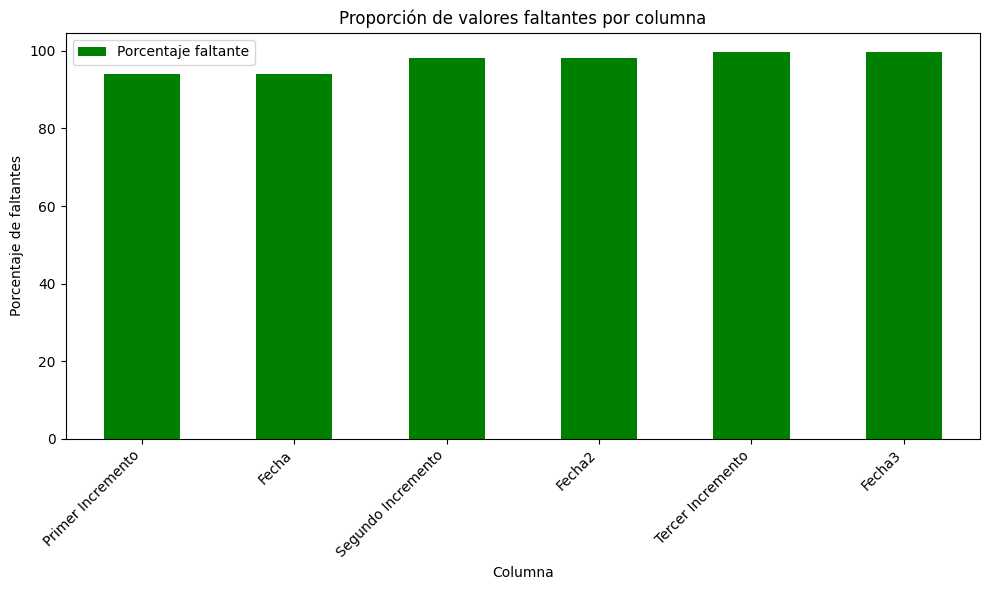

In [7]:
col_con_na = []
for col in DB_loans.columns:
    porcentaje_faltante = DB_loans[col].isnull().mean()

    if(porcentaje_faltante > 0):
        col_con_na.append((col, porcentaje_faltante*100))

if col_con_na:
    col_con_nan_df = pd.DataFrame(col_con_na, columns=['Columna', 'Porcentaje faltante'])
    col_con_nan_df.plot(x='Columna', y='Porcentaje faltante', kind='bar', color='green', figsize=(10, 6))
    plt.title('Proporción de valores faltantes por columna')
    plt.xlabel('Columna')
    plt.ylabel('Porcentaje de faltantes')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

#### Con el análisis preliminar se observa que los campos con datos faltantes superan más del 80% y 90%

In [8]:
col_faltantes = []
for col_name in DB_loans.columns[DB_loans.isnull().any()]:
    tipo_dato = DB_loans[col_name].dtype
    col_faltantes.append((col_name, tipo_dato))

for col, tipo in col_faltantes:
    print(f'La columna "{col}" de tipo {tipo} tiene valores faltantes.')

La columna "Primer Incremento" de tipo float64 tiene valores faltantes.
La columna "Fecha" de tipo object tiene valores faltantes.
La columna "Segundo Incremento" de tipo float64 tiene valores faltantes.
La columna "Fecha2" de tipo float64 tiene valores faltantes.
La columna "Tercer Incremento" de tipo float64 tiene valores faltantes.
La columna "Fecha3" de tipo float64 tiene valores faltantes.


# 4. Análisis de casos completos CCA
#### Se observa que los campos son de tipo float64, se procederá a realizar un análisis CCA.

In [9]:
#Se analizan los porcentajes que tenemos en las columnas faltantes previo a la depuración por CCA
col_con_nan = []

for col in DB_loans.columns:
    porcentaje_falta = DB_loans[col].isnull().mean()
    if(porcentaje_falta > 0):
        col_con_nan.append(col)


DB_loans[col_con_nan].isnull().mean()

Primer Incremento     0.941114
Fecha                 0.941114
Segundo Incremento    0.982973
Fecha2                0.982973
Tercer Incremento     0.996807
Fecha3                0.996807
dtype: float64

#### Se observa que el porcentaje de faltantes supera el 90%, por lo que se debe proceder a descartar las columnas para el análisis/modelo

In [10]:
cols_for_cca = [col for col in DB_loans.columns if DB_loans[col].isnull().mean()<0.06]
cols_for_cca

['id',
 'first_name',
 'last_name',
 'email',
 'gender',
 'Desembolso',
 'Vencimiento',
 'Tasa Original',
 'Tasa Actual',
 'Fecha Último Incremento',
 'Total bps Incrementados',
 'Número de Incrementos',
 'Saldo de Capital',
 'Código Moneda',
 'Saldo de Capital Quetzalizado',
 'Status Mora',
 'Reserva Dinamica',
 'Reserva Especifica',
 'SegmentoPPTO',
 'SegmentoComercial',
 'Saldo$',
 'IntAnual$_TasaOriginal',
 'IntAnual$_TasaActual',
 'FechaReporte',
 'PE_31.12.2023',
 'PE_30.04.2024',
 'PD_MAX_2024_04_30',
 'LGD_MAX_2024_04_30',
 'VAR_PE',
 'Saldo$Original',
 'Nuevo',
 'PlazoRestante(Dias)',
 'PD_Anualizada',
 'LGD_Anualizada',
 'Reserva Especifica$',
 'Brecha_Plazo',
 'Reserva_Específica_JM-93-2005',
 'Reserva_Genérica_JM-93-2005',
 'Total Reservas_JM-93-2005',
 'Var_Reserva_Específica_New',
 'Var_Reserva_Específica_2024',
 'Ab_24',
 'Tasa_Propuesta',
 'bps%',
 'Estratégico',
 'IntAnual_TasaPropuesta',
 'Tasa_Actual%',
 'Tasa_Costo_Oportunidad',
 'FTP',
 'SpreadvsFTP',
 'TIR',
 'Can

#### extraemos columna por columna siempre que el porcentaje de los faltantes sea menor que 6%

In [11]:
#eliminar filas y columnas que tengan na
DB_loans_cca = DB_loans[cols_for_cca].dropna()
DB_loans.shape, DB_loans_cca.shape

((2819, 66), (2819, 60))

#### Luego del proceso, quedan 2819 filas y 60 columnas dado que se quitaron aquellas que sobrepasan el umbral indicado

In [12]:
DB_loans_cca.head()

,id,first_name,last_name,email,gender,Desembolso,Vencimiento,Tasa Original,Tasa Actual,Fecha Último Incremento,...,TIR,Cant.Pagarés,Suma_Asegurada,Flujo_Ingreso,Fujo_Costo,Com_Desembolso,Opex,PE,Rec_Capital,ISR
0,1,Celeste,Gallafant,cgallafant0@google.cn,Female,2/08/2022,30/04/2037,6.75,7.50,31/03/2024,...,0.006062,0,0.000,2.020633e+06,-1.694724e+06,0.0,0.0,97795.48672,3724668.653,-140440.66620
1,2,Alex,Skunes,askunes1@clickbank.net,Female,12/09/2022,28/02/2039,7.50,7.75,28/02/2023,...,0.008112,0,1511406.916,1.857647e+06,-1.509339e+06,0.0,0.0,98768.73707,2902574.199,-128877.29420
2,3,Kev,Enns,kenns2@ft.com,Male,23/10/2023,25/05/2026,7.25,7.50,31/03/2024,...,0.005582,0,0.000,3.088080e+05,-2.509065e+05,0.0,0.0,50038.62688,2573399.796,-21462.15430
3,4,Sioux,Di Meo,sdimeo3@xinhuanet.com,Female,17/07/2023,17/07/2028,8.25,8.50,31/03/2024,...,0.009979,0,0.000,4.828663e+05,-3.692507e+05,0.0,0.0,12103.22912,2272312.020,-33491.83332
4,5,Caron,Niave,cniave4@businessweek.com,Female,23/11/2023,25/05/2026,7.00,7.50,31/03/2024,...,0.005594,0,0.000,2.048941e+05,-1.664764e+05,0.0,0.0,33200.62893,1707450.764,-14188.18243


# 5.  Evaluación y selección de variable categórica a predecir

In [13]:
DB_loans_cca['Desembolso'] = pd.to_datetime(DB_loans_cca['Desembolso'], format='%d/%m/%Y', dayfirst=True)
DB_loans_cca['Vencimiento'] = pd.to_datetime(DB_loans_cca['Vencimiento'], format='%d/%m/%Y', dayfirst=True)
DB_loans_cca['FechaReporte'] = pd.to_datetime(DB_loans_cca['FechaReporte'], format='%d/%m/%Y', dayfirst=True)
#Cambio tipo variable de Status_date a tipo fecha

print(DB_loans_cca[['Desembolso', 'Vencimiento', 'Fecha Último Incremento', 'FechaReporte']].head())

  Desembolso Vencimiento Fecha Último Incremento FechaReporte
0 2022-08-02  2037-04-30              31/03/2024   2024-04-30
1 2022-09-12  2039-02-28              28/02/2023   2024-04-30
2 2023-10-23  2026-05-25              31/03/2024   2024-04-30
3 2023-07-17  2028-07-17              31/03/2024   2024-04-30
4 2023-11-23  2026-05-25              31/03/2024   2024-04-30


In [14]:
object_columns = DB_loans_cca.select_dtypes(include='object').columns

object_types = DB_loans_cca[object_columns].dtypes

object_types

first_name                 object
last_name                  object
email                      object
gender                     object
Fecha Último Incremento    object
Código Moneda              object
Status Mora                object
SegmentoPPTO               object
SegmentoComercial          object
Nuevo                      object
Brecha_Plazo               object
Estratégico                object
dtype: object

#### Se muestran los campos de tipo categórico para realizar la ingeniería de características necesaria

In [15]:
dataCE = DB_loans_cca[['Código Moneda','Status Mora', 'SegmentoComercial', 'Nuevo', 'Brecha_Plazo' ]]
dataCE.head()

,Código Moneda,Status Mora,SegmentoComercial,Nuevo,Brecha_Plazo
0,Quetzales,Vigente,1_INMOBILIARIA,Anterior,5 - AÑO 15
1,Quetzales,Vigente,1_INMOBILIARIA,Anterior,5 - AÑO 15
2,Quetzales,Vigente,1_INMOBILIARIA,Anterior,2 - AÑO 3
3,Quetzales,Vigente,3_COMERCIAL,Anterior,3 - AÑO 5
4,Quetzales,Vigente,1_INMOBILIARIA,Anterior,2 - AÑO 3


#### Revisar las categorías en cada variable categórica

In [16]:
dataCE['Código Moneda'].unique()
#ver categorías de la variable Código Moneda

array(['Quetzales', 'Dólares'], dtype=object)

In [17]:
dataCE['Status Mora'].unique()
#ver categorías de la variable Status Mora

array(['Vigente', 'Mora 30', 'Judicial', 'Vencida', 'Mora 60', 'Mora 90'],
      dtype=object)

In [18]:
dataCE['SegmentoComercial'].unique()
#ver categorías de la variable SegmentoComercial

array(['1_INMOBILIARIA', '3_COMERCIAL', '4_RETAIL', '2_NEGOCIO',
       '5_INTERCOMPANY'], dtype=object)

In [19]:
dataCE['Nuevo'].unique()
#ver categorías de la variable nuevo

array(['Anterior', 'Nuevo'], dtype=object)

In [20]:
dataCE['Brecha_Plazo'].unique()
#ver categorías de la variable brecha_plazo

array(['5 - AÑO 15', '2 - AÑO 3', '3 - AÑO 5', '1 - AÑO 1', '4 - AÑO 10',
       '7 - AÑO 25'], dtype=object)

#### Se elige como Target la variable Segmento Comercial para que el modelo de clasificación nos ayude a clasificar a qué agrupación corresponde

# 6. Codificación de variables

#### Codificación por Frecuencia

In [21]:
moneda_freq_dict = dataCE['Código Moneda'].value_counts(ascending = False).to_dict()
moneda_freq_dict
#Este nos servirá para crear catálogo y no perder la referencia de la categoría

{'Quetzales': 2667, 'Dólares': 152}

In [22]:
dataCE['Código Moneda']=dataCE['Código Moneda'].map(moneda_freq_dict)
dataCE.head()

C:\Users\Walter\AppData\Local\Temp\ipykernel_8072\2321967119.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataCE['Código Moneda']=dataCE['Código Moneda'].map(moneda_freq_dict)


,Código Moneda,Status Mora,SegmentoComercial,Nuevo,Brecha_Plazo
0,2667,Vigente,1_INMOBILIARIA,Anterior,5 - AÑO 15
1,2667,Vigente,1_INMOBILIARIA,Anterior,5 - AÑO 15
2,2667,Vigente,1_INMOBILIARIA,Anterior,2 - AÑO 3
3,2667,Vigente,3_COMERCIAL,Anterior,3 - AÑO 5
4,2667,Vigente,1_INMOBILIARIA,Anterior,2 - AÑO 3


In [23]:
statusmora_freq_dict = dataCE['Status Mora'].value_counts(ascending = False).to_dict()
statusmora_freq_dict
#Este nos servirá para crear catálogo y no perder la referencia de la categoría

{'Vigente': 2781,
 'Judicial': 24,
 'Vencida': 5,
 'Mora 30': 4,
 'Mora 60': 3,
 'Mora 90': 2}

In [24]:
dataCE['Status Mora']=dataCE['Status Mora'].map(statusmora_freq_dict)
dataCE.head()

C:\Users\Walter\AppData\Local\Temp\ipykernel_8072\523828254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataCE['Status Mora']=dataCE['Status Mora'].map(statusmora_freq_dict)


,Código Moneda,Status Mora,SegmentoComercial,Nuevo,Brecha_Plazo
0,2667,2781,1_INMOBILIARIA,Anterior,5 - AÑO 15
1,2667,2781,1_INMOBILIARIA,Anterior,5 - AÑO 15
2,2667,2781,1_INMOBILIARIA,Anterior,2 - AÑO 3
3,2667,2781,3_COMERCIAL,Anterior,3 - AÑO 5
4,2667,2781,1_INMOBILIARIA,Anterior,2 - AÑO 3


In [25]:
label_encoder = LabelEncoder()

dataCE['SegmentoComercial'] = label_encoder.fit_transform(dataCE['SegmentoComercial'])

dataCE.head()

C:\Users\Walter\AppData\Local\Temp\ipykernel_8072\1280441817.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataCE['SegmentoComercial'] = label_encoder.fit_transform(dataCE['SegmentoComercial'])


,Código Moneda,Status Mora,SegmentoComercial,Nuevo,Brecha_Plazo
0,2667,2781,0,Anterior,5 - AÑO 15
1,2667,2781,0,Anterior,5 - AÑO 15
2,2667,2781,0,Anterior,2 - AÑO 3
3,2667,2781,2,Anterior,3 - AÑO 5
4,2667,2781,0,Anterior,2 - AÑO 3


In [26]:
equivalencias = {index: label for index, label in enumerate(label_encoder.classes_)}

# Esto nos brindará la información de la equivalencia entre la etiqueta original y el código asignado.
print('Equivalencias entre códigos y etiquetas originales:')
print(equivalencias)

Equivalencias entre códigos y etiquetas originales:
{0: '1_INMOBILIARIA', 1: '2_NEGOCIO', 2: '3_COMERCIAL', 3: '4_RETAIL', 4: '5_INTERCOMPANY'}


#### Para la variable SegmentoComercial, se ha decidido codificar mediante label Encoder dado que es nuestra variable Target

In [27]:
nuevo_freq_dict = dataCE['Nuevo'].value_counts(ascending = False).to_dict()
nuevo_freq_dict
#Este nos servirá para crear catálogo y no perder la referencia de la categoría

{'Anterior': 2777, 'Nuevo': 42}

In [28]:
dataCE['Nuevo']=dataCE['Nuevo'].map(nuevo_freq_dict)
dataCE.head()

C:\Users\Walter\AppData\Local\Temp\ipykernel_8072\2696384752.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataCE['Nuevo']=dataCE['Nuevo'].map(nuevo_freq_dict)


,Código Moneda,Status Mora,SegmentoComercial,Nuevo,Brecha_Plazo
0,2667,2781,0,2777,5 - AÑO 15
1,2667,2781,0,2777,5 - AÑO 15
2,2667,2781,0,2777,2 - AÑO 3
3,2667,2781,2,2777,3 - AÑO 5
4,2667,2781,0,2777,2 - AÑO 3


In [29]:
label_encoder = LabelEncoder()

dataCE['Brecha_encoded'] = label_encoder.fit_transform(dataCE['Brecha_Plazo'])

dataCE.head()

C:\Users\Walter\AppData\Local\Temp\ipykernel_8072\3379975485.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataCE['Brecha_encoded'] = label_encoder.fit_transform(dataCE['Brecha_Plazo'])


,Código Moneda,Status Mora,SegmentoComercial,Nuevo,Brecha_Plazo,Brecha_encoded
0,2667,2781,0,2777,5 - AÑO 15,4
1,2667,2781,0,2777,5 - AÑO 15,4
2,2667,2781,0,2777,2 - AÑO 3,1
3,2667,2781,2,2777,3 - AÑO 5,2
4,2667,2781,0,2777,2 - AÑO 3,1


#### Para la variable Brecha_plazo, se ha decidido codificar mediante label Encoder

## Dataset generado luego del análisis de faltantes y cambio de categóricos a numéricos codificados

In [30]:
df1_seleccionado = DB_loans_cca[['Desembolso', 'Vencimiento','Saldo$', 'FechaReporte','PE_30.04.2024', 'PD_MAX_2024_04_30', 'LGD_MAX_2024_04_30', 'PlazoRestante(Dias)', 'Reserva Especifica$', 'Ab_24', 'Tasa_Propuesta', 'bps%','IntAnual_TasaPropuesta', 'Tasa_Costo_Oportunidad', 'FTP', 'TIR' ]]

df2_seleccionado = dataCE.drop(columns=['Brecha_Plazo'])

df_loans = pd.concat([df1_seleccionado, df2_seleccionado], axis = 1)

df_loans.head()

,Desembolso,Vencimiento,Saldo$,FechaReporte,PE_30.04.2024,PD_MAX_2024_04_30,LGD_MAX_2024_04_30,PlazoRestante(Dias),Reserva Especifica$,Ab_24,...,bps%,IntAnual_TasaPropuesta,Tasa_Costo_Oportunidad,FTP,TIR,Código Moneda,Status Mora,SegmentoComercial,Nuevo,Brecha_encoded
0,2022-08-02,2037-04-30,3724668.653,2024-04-30,99427.84220,0.075018,0.3500,4748,72351.20216,0.0750,...,0.0025,288661.8206,0.065,0.083098,0.006062,2667,2781,0,2777,4
1,2022-09-12,2039-02-28,2902574.199,2024-04-30,100418.02520,0.097223,0.3500,5417,56339.50477,0.0775,...,0.0025,232205.9359,0.065,0.084221,0.008112,2667,2781,0,2777,4
2,2023-10-23,2026-05-25,2573399.796,2024-04-30,50873.84772,0.097223,0.2000,755,49795.28605,0.0750,...,0.0050,205871.9837,0.065,0.076396,0.005582,2667,2781,0,2777,1
3,2023-07-17,2028-07-17,2272312.020,2024-04-30,12008.44648,0.014032,0.3796,1539,43969.23758,0.0850,...,0.0000,193146.5217,0.065,0.077712,0.009979,2667,2781,2,2777,2
4,2023-11-23,2026-05-25,1707450.764,2024-04-30,33754.79796,0.097223,0.2000,755,28521.49497,0.0750,...,0.0050,136596.0612,0.065,0.076396,0.005594,2667,2781,0,2777,1


In [31]:
df_loans.dtypes

Desembolso                datetime64[ns]
Vencimiento               datetime64[ns]
Saldo$                           float64
FechaReporte              datetime64[ns]
PE_30.04.2024                    float64
PD_MAX_2024_04_30                float64
LGD_MAX_2024_04_30               float64
PlazoRestante(Dias)                int64
Reserva Especifica$              float64
Ab_24                            float64
Tasa_Propuesta                   float64
bps%                             float64
IntAnual_TasaPropuesta           float64
Tasa_Costo_Oportunidad           float64
FTP                              float64
TIR                              float64
Código Moneda                      int64
Status Mora                        int64
SegmentoComercial                  int32
Nuevo                              int64
Brecha_encoded                     int32
dtype: object

In [32]:
#Se exporta dataset con cambios
df_loans.to_csv('../data/processed/df_loans.csv', index=False)

# 7.  Identificar variables discretas y continuas

In [33]:
def get_variables_scale(dataset):
       categoricas = [col for col in dataset.columns if dataset[col].dtype == 'object']
       continuas = [col for col in dataset.columns if dataset[col].dtype in ['float64', 'int64'] and len(dataset[col].unique()) > 30]
       discretas = [col for col in dataset.columns if dataset[col].dtype in ['float64', 'int64'] and len(dataset[col].unique()) <= 30]

       print("Variables Categóricas:")
       print(categoricas)
       print("\nVariables Continuas:")
       print(continuas)
       print("\nVariables Discretas:")
       print(discretas)

       return categoricas, continuas, discretas

In [34]:
cat, cont, disct = get_variables_scale(df_loans)

Variables Categóricas:
[]

Variables Continuas:
['Saldo$', 'PE_30.04.2024', 'PD_MAX_2024_04_30', 'PlazoRestante(Dias)', 'Reserva Especifica$', 'Ab_24', 'Tasa_Propuesta', 'IntAnual_TasaPropuesta', 'FTP', 'TIR']

Variables Discretas:
['LGD_MAX_2024_04_30', 'bps%', 'Tasa_Costo_Oportunidad', 'Código Moneda', 'Status Mora', 'Nuevo']


# 8. Análisis de Outliers

#### Para las variables que se consideren continuas se aplicará tratamiento de outliers por medio de capping de final de cola en la medida de lo posible para evitar reducción de dataset

In [35]:
#Se crea función para analizar outliers
def plot_outliers_analysis(dataset, col):

    plt.figure(figsize=(15,6))
    print(col)
    plt.subplot(131)
    sns.histplot(dataset[col], bins = 30)
    plt.title("Densisdad -Histograma")

    plt.subplot(132)
    stats.probplot(dataset[col], dist ="norm", plot=plt)
    plt.title("QQ-Plot")

    plt.subplot(133)
    sns.boxplot(y = dataset[col])
    plt.title("boxplot")
    plt.show()

Saldo$


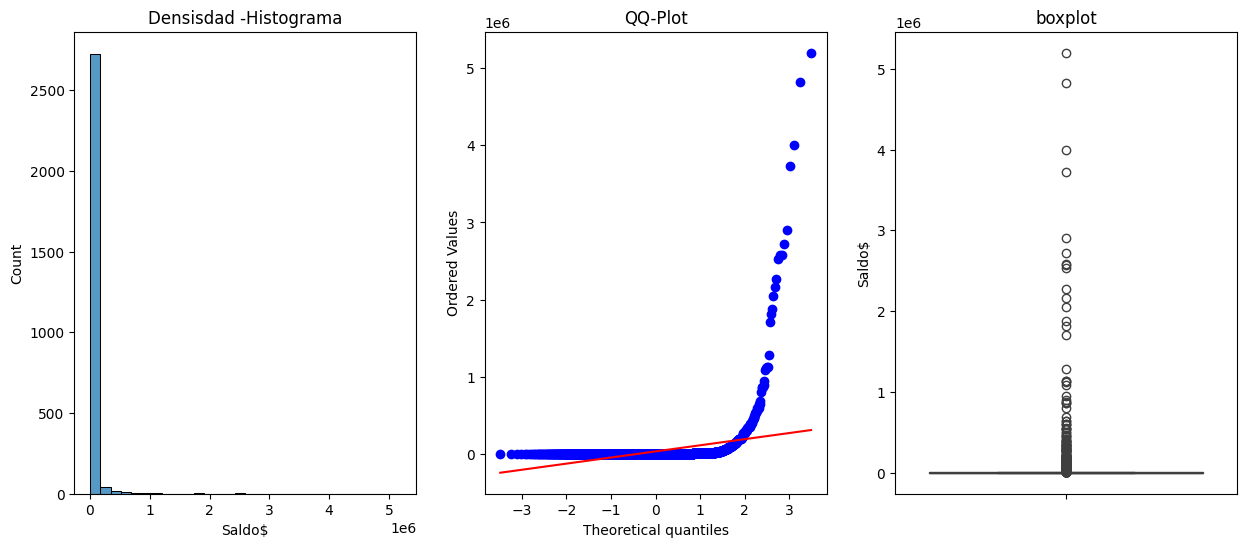

PE_30.04.2024


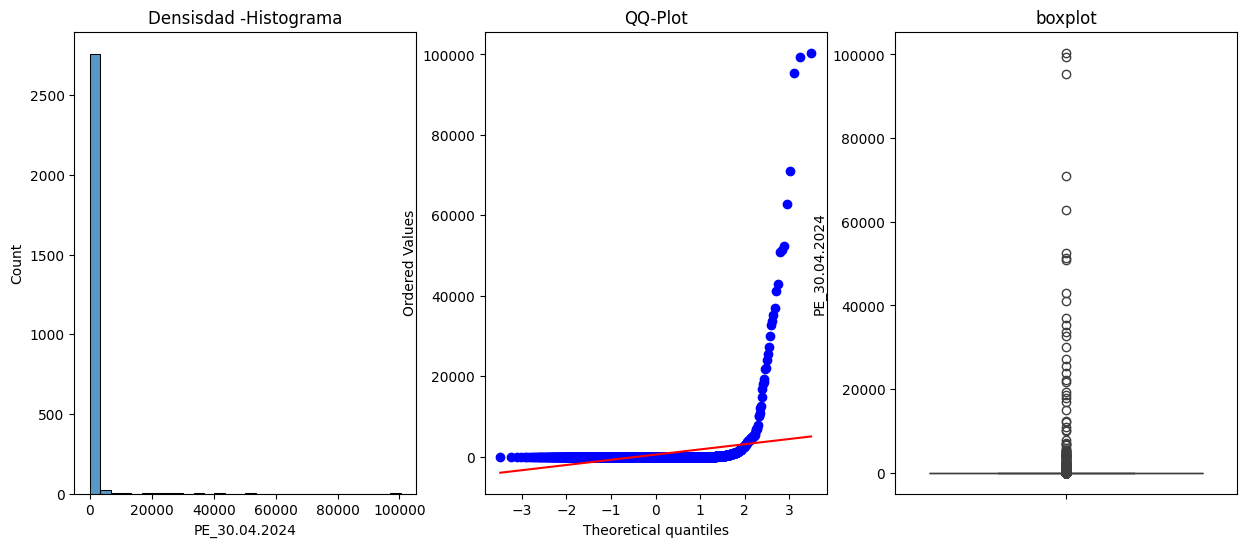

PD_MAX_2024_04_30


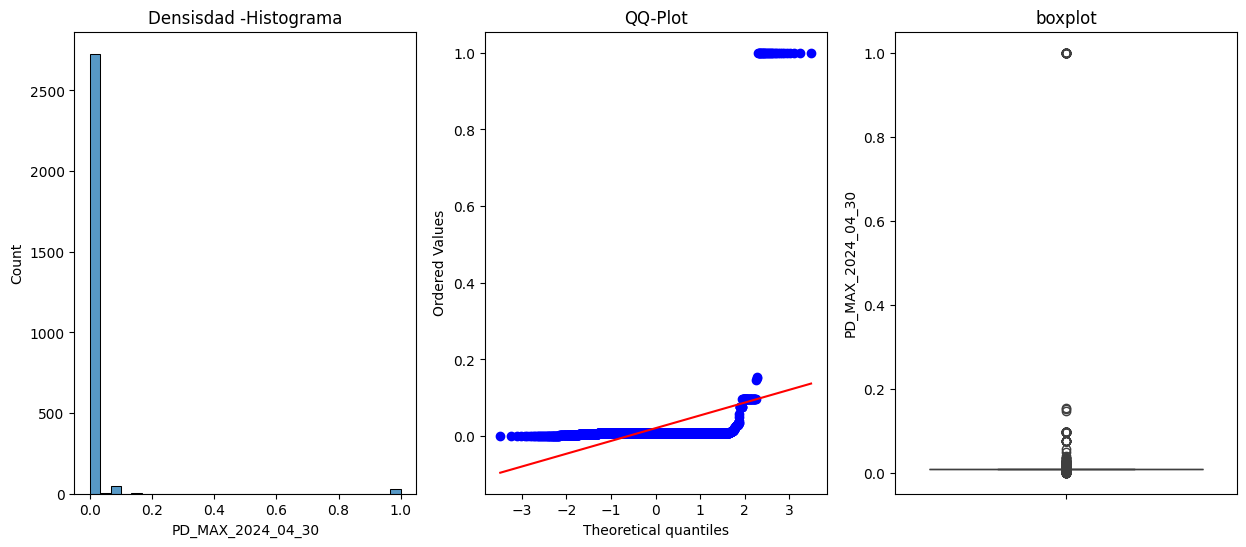

PlazoRestante(Dias)


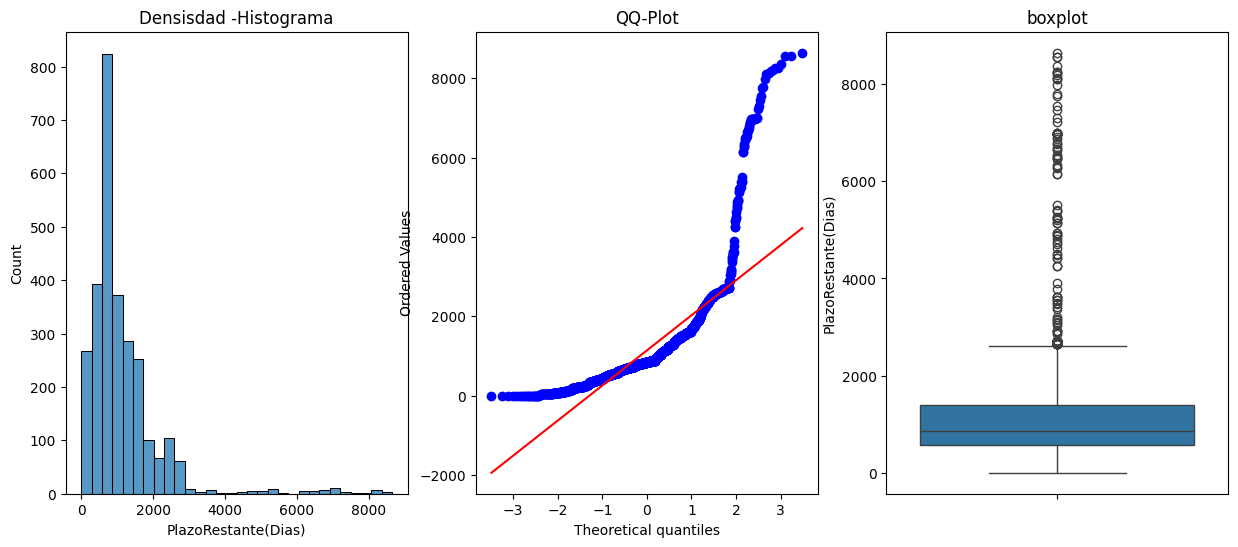

Reserva Especifica$


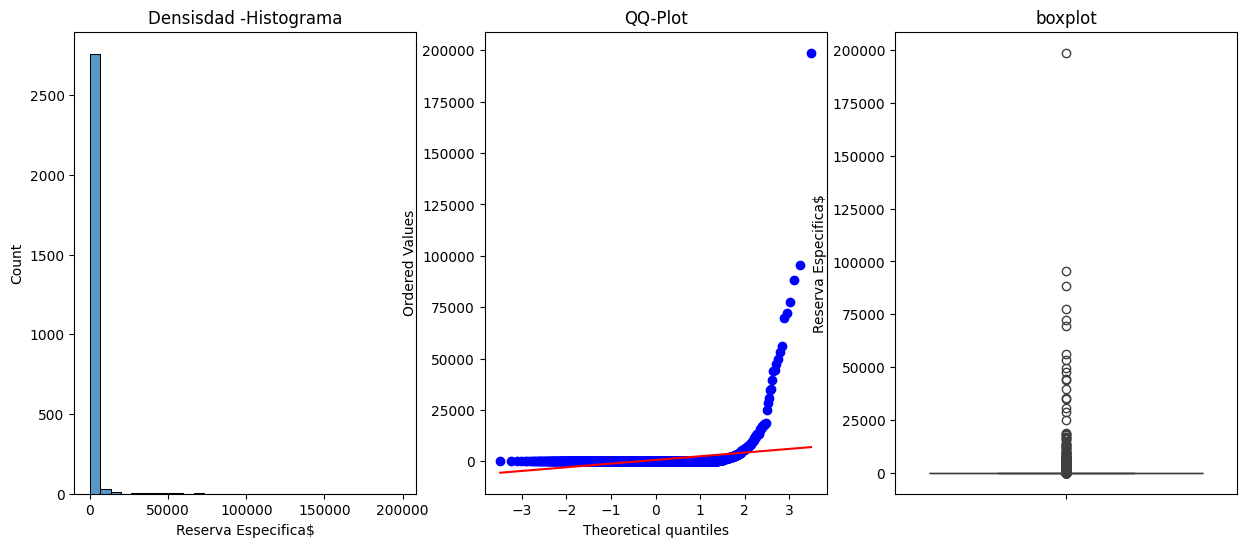

Ab_24


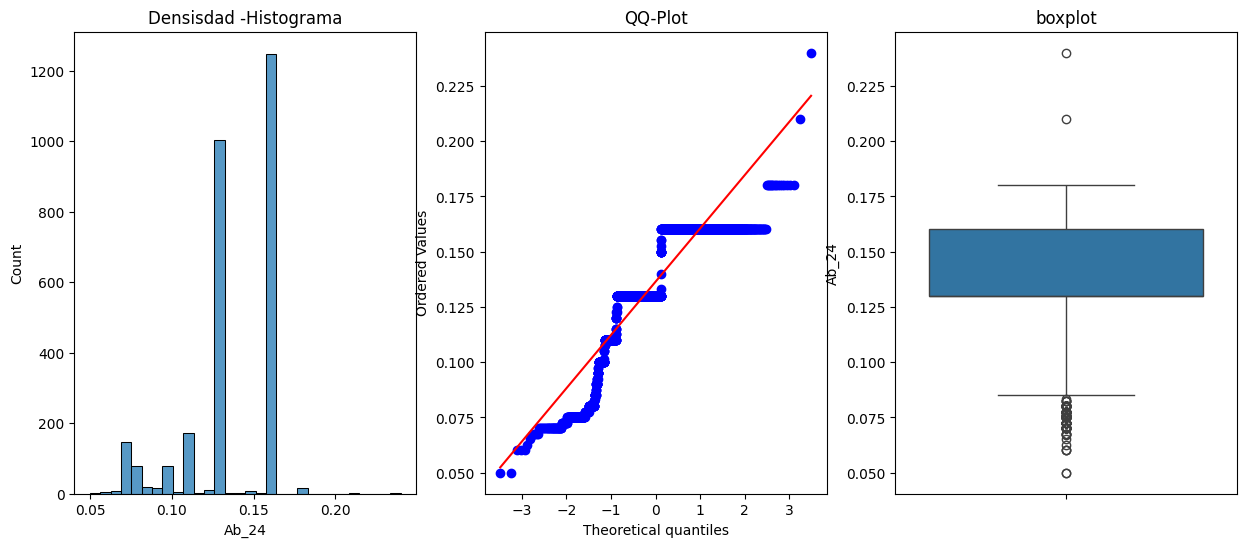

Tasa_Propuesta


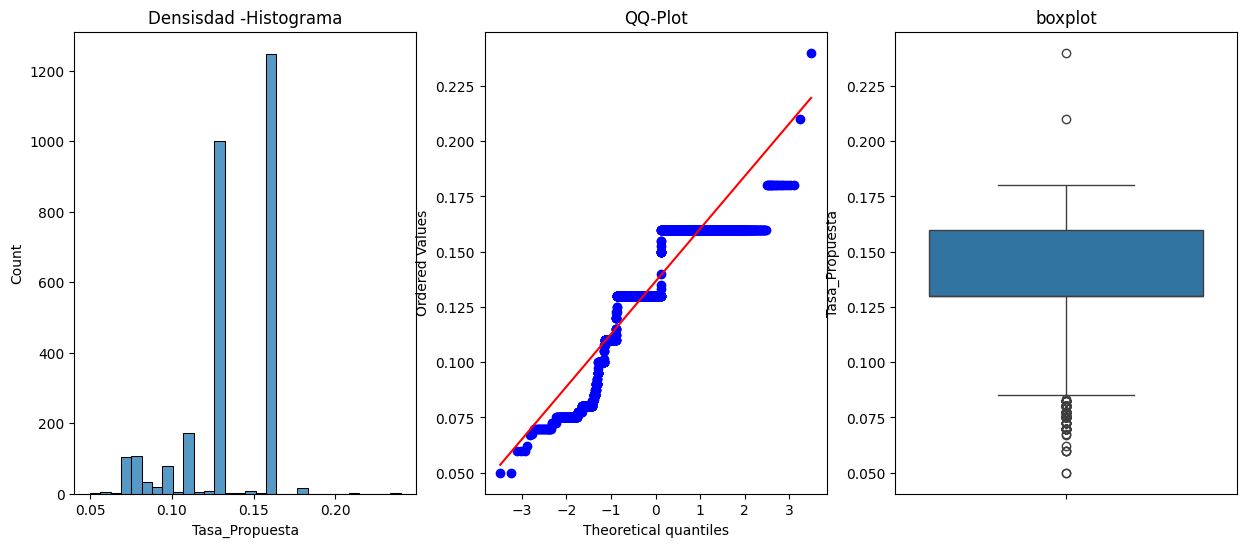

IntAnual_TasaPropuesta


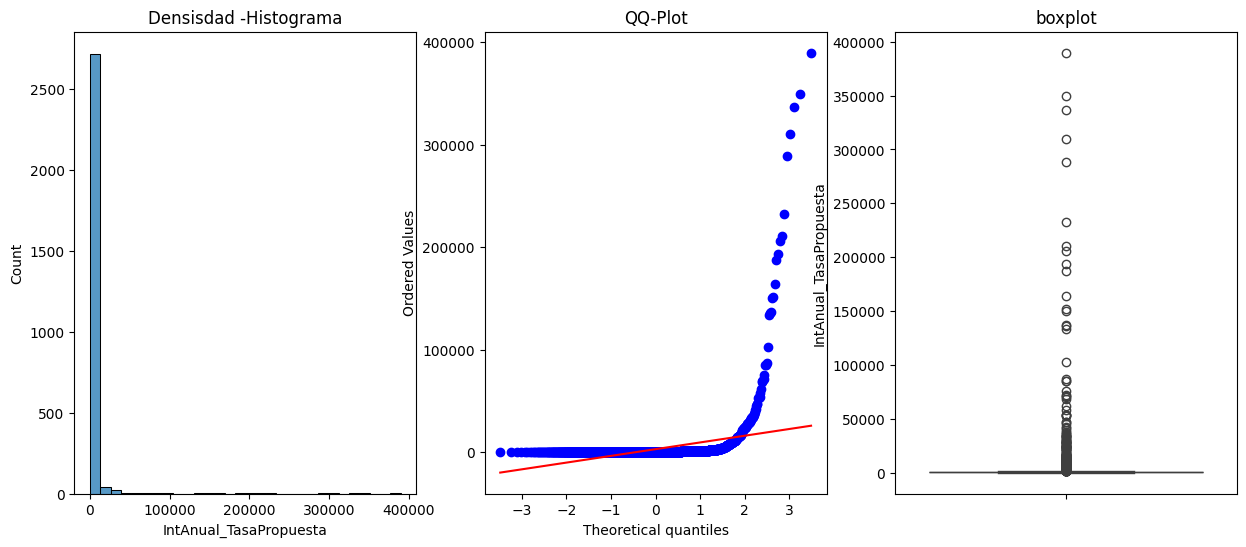

FTP


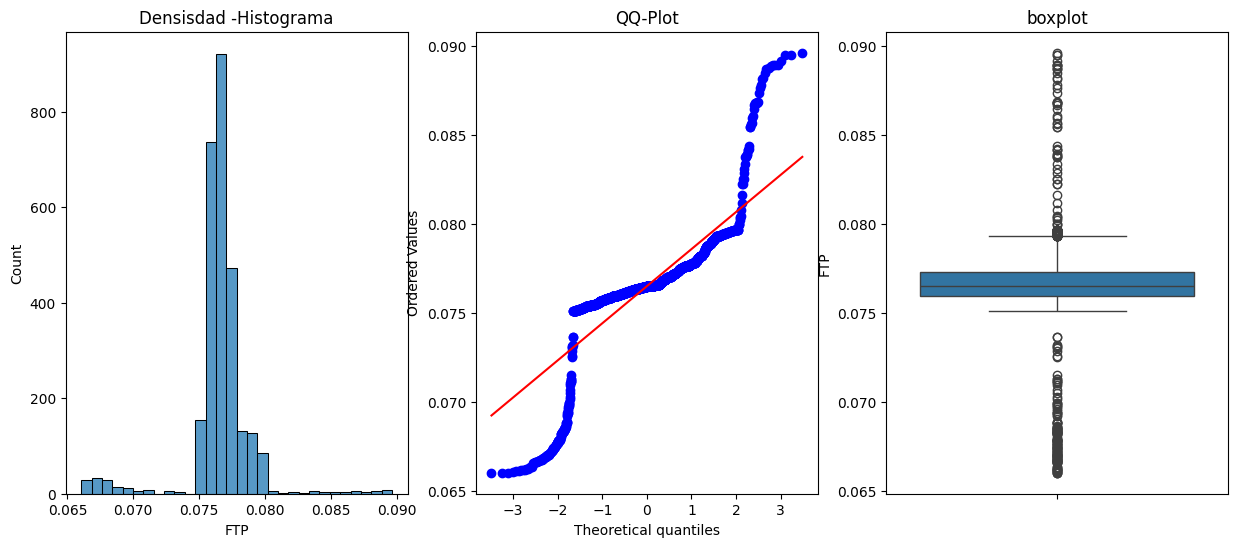

TIR


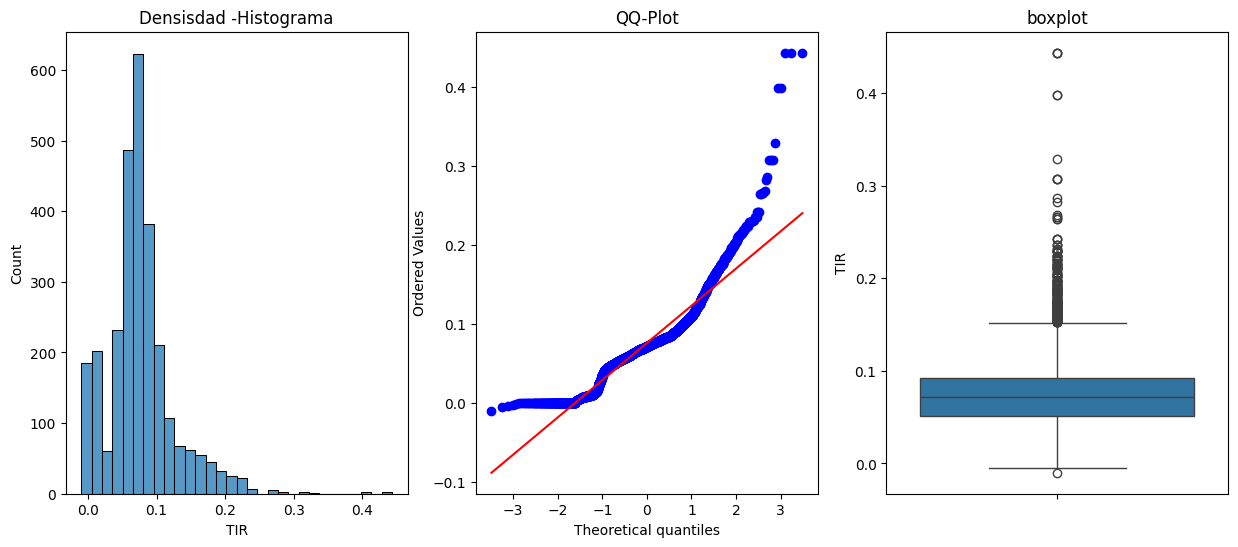

In [36]:
#análisis completo de las variables continuas con revisión de outliers
for col in cont:
  plot_outliers_analysis(df_loans, col)

#### 2.2 Método capping de final de cola para variable "Saldo$"

In [37]:
#Cálculo de IQR, limite inferior y límite superior
def get_outliers_limits(dataset, col):
    IQR = df_loans["Saldo$"].quantile(0.75) - df_loans["Saldo$"].quantile(0.25)
    LI = df_loans["Saldo$"].quantile(0.25)- (1.75*IQR)
    LS = df_loans["Saldo$"].quantile(0.75)+ (1.75*IQR)

    return LI,LS

In [38]:
get_outliers_limits(df_loans, "Saldo$")

(-6566.683865312498, 12606.041441562498)

In [39]:
LI, LS = get_outliers_limits(df_loans,"Saldo$")

df_loans["Saldo$_capp"] = np.where(df_loans["Saldo$"]>LS, LS, np.where(df_loans["Saldo$"]<LI,LI,df_loans["Saldo$"]))

Saldo$


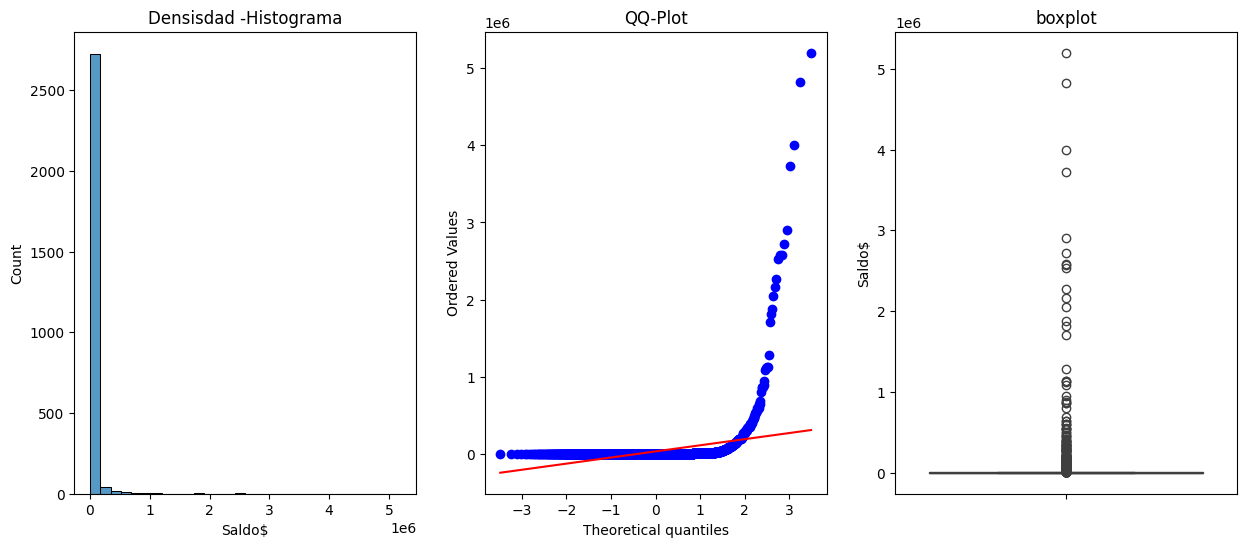

Saldo$_capp


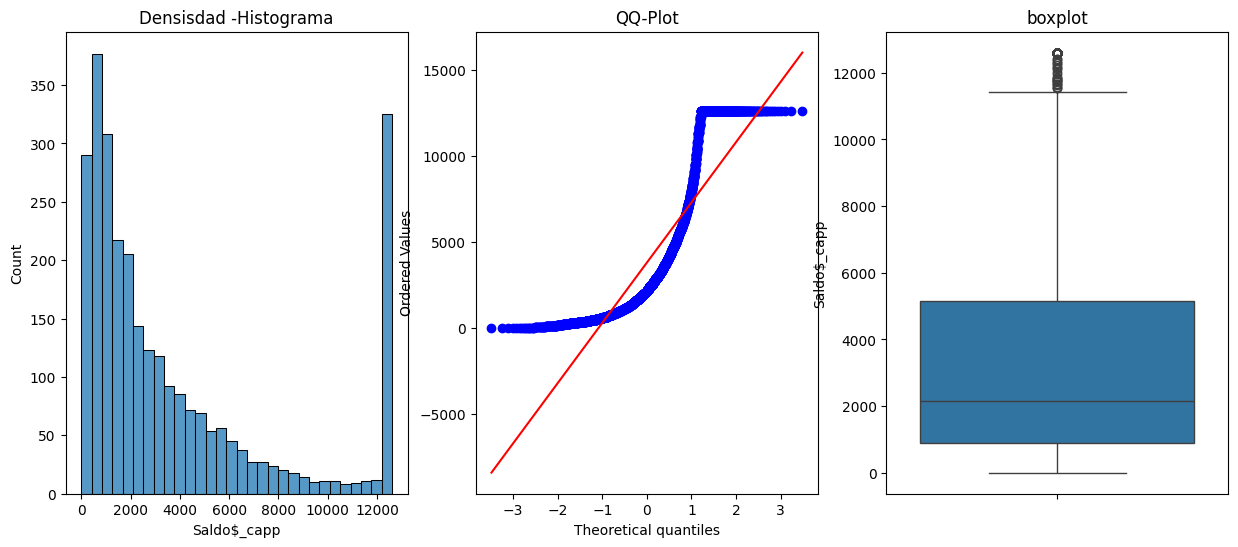

In [40]:
plot_outliers_analysis(df_loans, "Saldo$")
plot_outliers_analysis(df_loans, "Saldo$_capp")

#### 2.2 Método capping de final de cola para variable "PE_30.04.2024"

In [41]:
#Cálculo de IQR, limite inferior y límite superior
def get_outliers_limits(dataset, col):
    IQR = df_loans["PE_30.04.2024"].quantile(0.75) - df_loans["PE_30.04.2024"].quantile(0.25)
    LI = df_loans["PE_30.04.2024"].quantile(0.25)- (1.75*IQR)
    LS = df_loans["PE_30.04.2024"].quantile(0.75)+ (1.75*IQR)

    return LI,LS

In [42]:
get_outliers_limits(df_loans, "PE_30.04.2024")

(-0.083500934125, 0.131215753625)

In [43]:
LI, LS = get_outliers_limits(df_loans,"PE_30.04.2024")

df_loans["PE_30.04.2024_capp"] = np.where(df_loans["PE_30.04.2024"]>LS, LS, np.where(df_loans["PE_30.04.2024"]<LI,LI,df_loans["PE_30.04.2024"]))

PE_30.04.2024


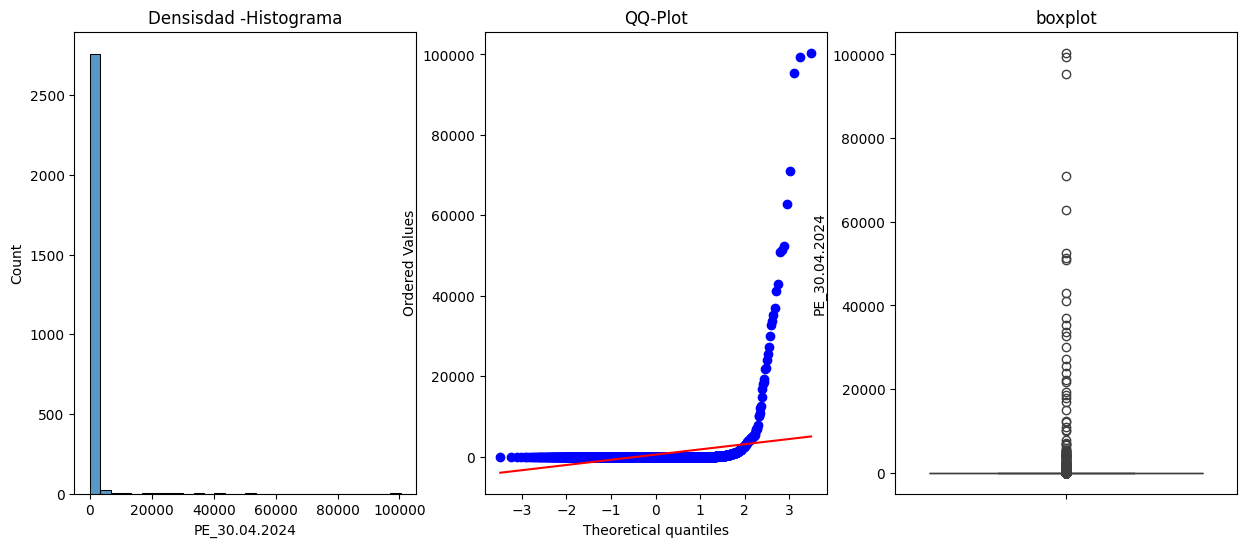

PE_30.04.2024_capp


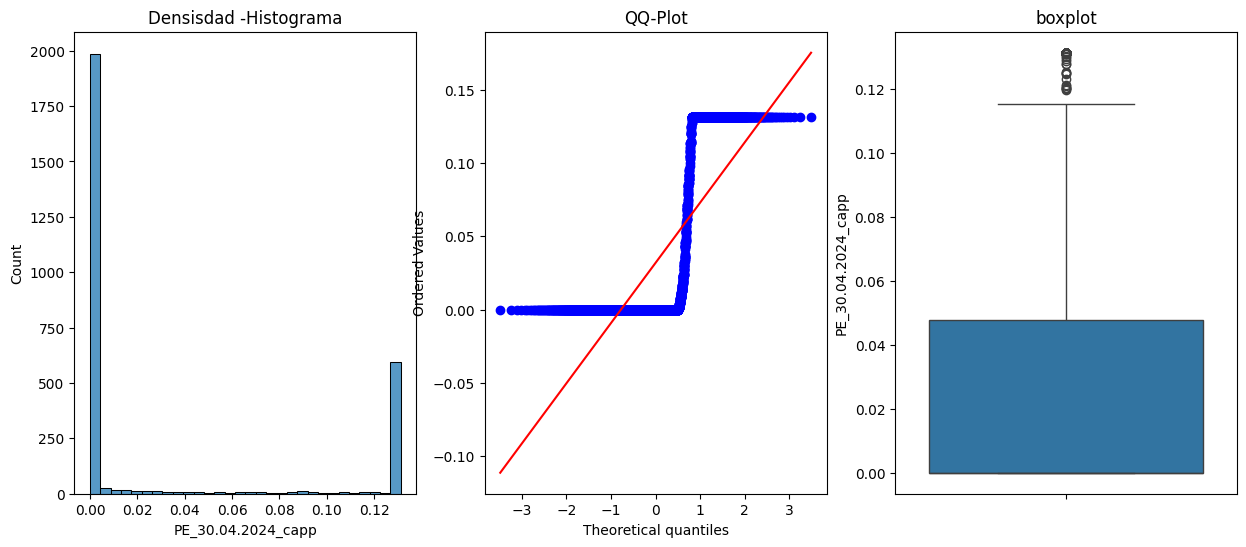

In [44]:
plot_outliers_analysis(df_loans, "PE_30.04.2024")
plot_outliers_analysis(df_loans, "PE_30.04.2024_capp")

#### 2.2 Método capping de final de cola para variable "PD_MAX_2024_04_30"

In [45]:
#Cálculo de IQR, limite inferior y límite superior
def get_outliers_limits(dataset, col):
    IQR = df_loans["PD_MAX_2024_04_30"].quantile(0.75) - df_loans["PD_MAX_2024_04_30"].quantile(0.25)
    LI = df_loans["PD_MAX_2024_04_30"].quantile(0.25)- (1.75*IQR)
    LS = df_loans["PD_MAX_2024_04_30"].quantile(0.75)+ (1.75*IQR)

    return LI,LS

In [46]:
get_outliers_limits(df_loans, "PD_MAX_2024_04_30")

(0.008578982, 0.008578982)

In [47]:
LI, LS = get_outliers_limits(df_loans,"PD_MAX_2024_04_30")

df_loans["PD_MAX_2024_04_30_capp"] = np.where(df_loans["PD_MAX_2024_04_30"]>LS, LS, np.where(df_loans["PD_MAX_2024_04_30"]<LI,LI,df_loans["PD_MAX_2024_04_30"]))

PD_MAX_2024_04_30


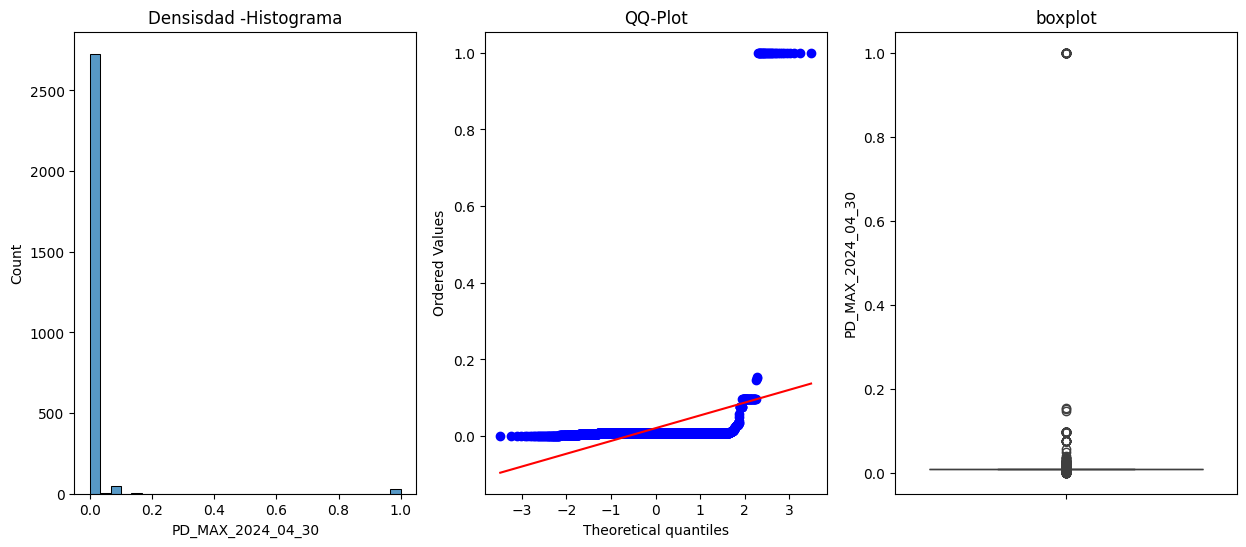

PD_MAX_2024_04_30_capp


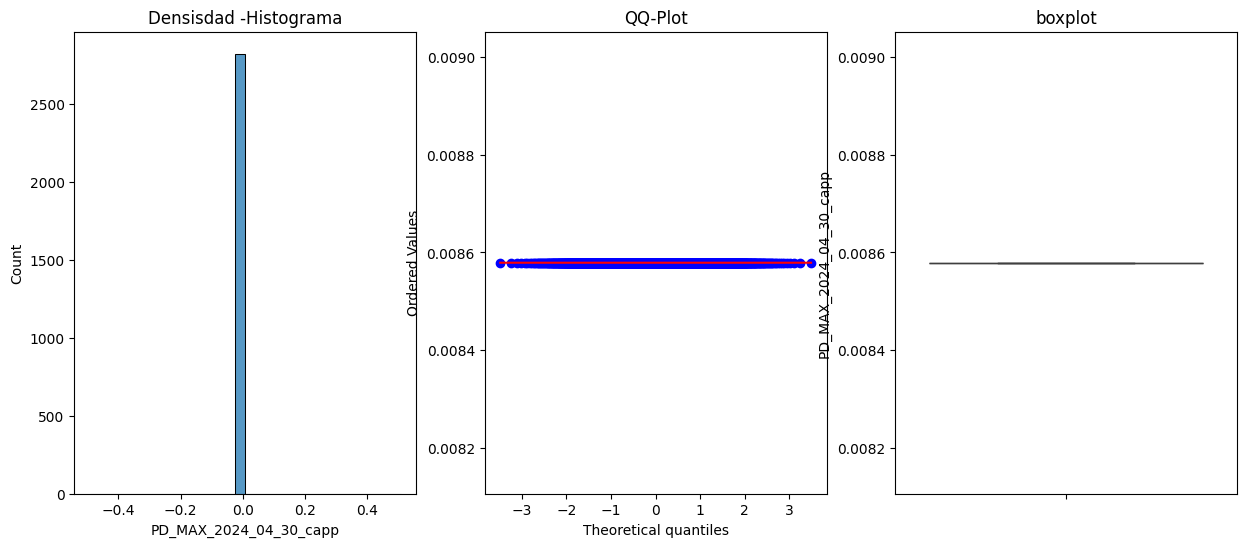

In [48]:
plot_outliers_analysis(df_loans, "PD_MAX_2024_04_30")
plot_outliers_analysis(df_loans, "PD_MAX_2024_04_30_capp")

#### 2.2 Método capping de final de cola para variable "PlazoRestante(Dias)"

In [49]:
#Cálculo de IQR, limite inferior y límite superior
def get_outliers_limits(dataset, col):
    IQR = df_loans["PlazoRestante(Dias)"].quantile(0.75) - df_loans["PlazoRestante(Dias)"].quantile(0.25)
    LI = df_loans["PlazoRestante(Dias)"].quantile(0.25)- (1.75*IQR)
    LS = df_loans["PlazoRestante(Dias)"].quantile(0.75)+ (1.75*IQR)

    return LI,LS

In [50]:
get_outliers_limits(df_loans, "PlazoRestante(Dias)")

(-857.75, 2836.75)

In [51]:
LI, LS = get_outliers_limits(df_loans,"PlazoRestante(Dias)")

df_loans["PlazoRestante(Dias)_capp"] = np.where(df_loans["PlazoRestante(Dias)"]>LS, LS, np.where(df_loans["PlazoRestante(Dias)"]<LI,LI,df_loans["PlazoRestante(Dias)"]))

PlazoRestante(Dias)


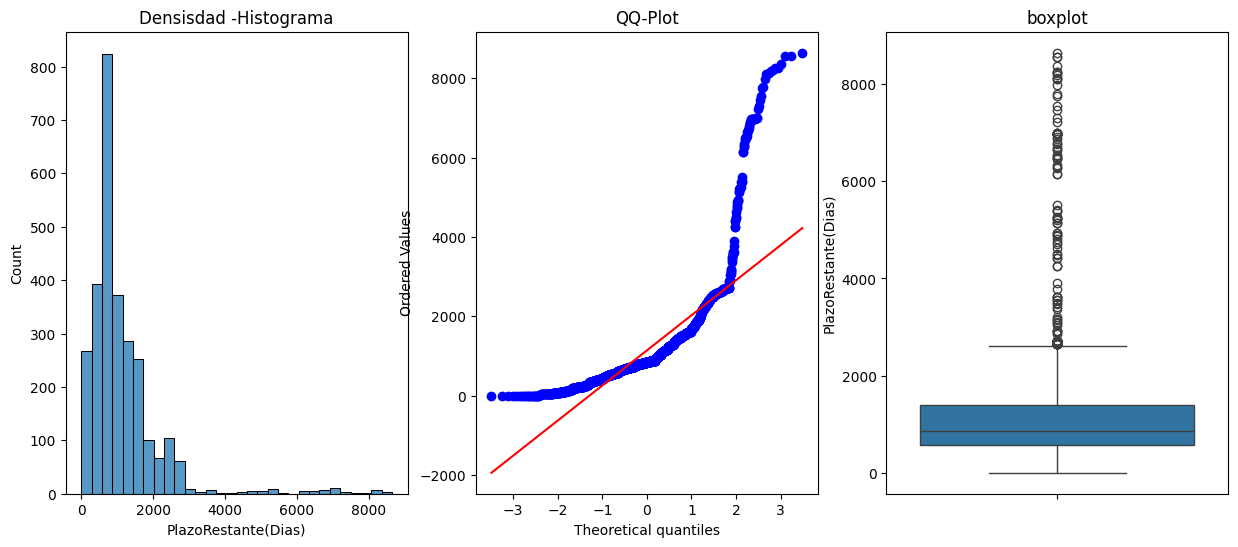

PlazoRestante(Dias)_capp


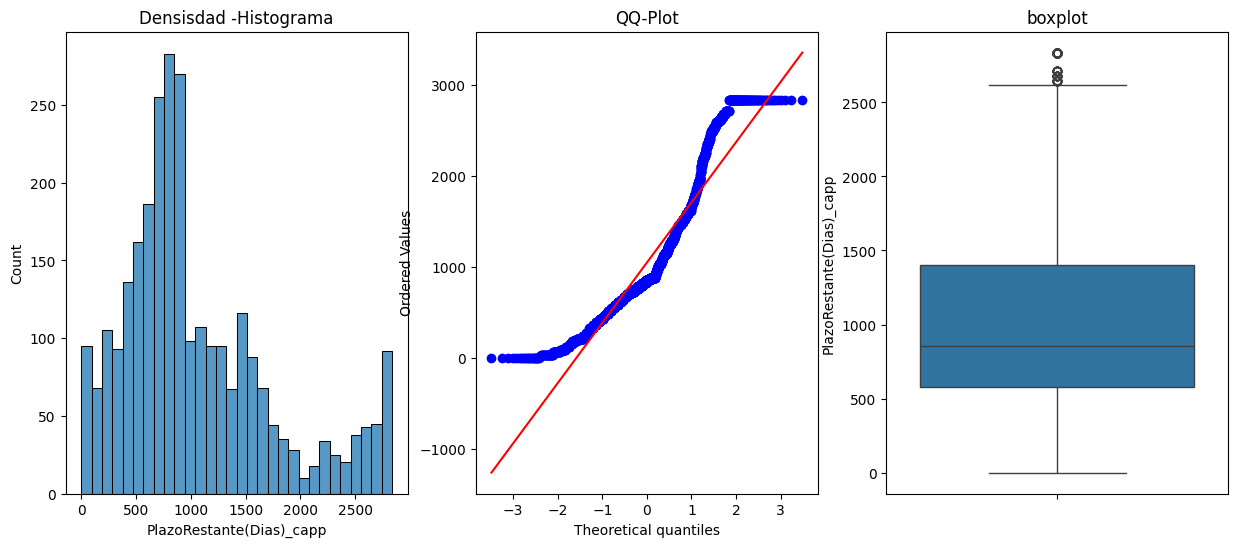

In [52]:
plot_outliers_analysis(df_loans, "PlazoRestante(Dias)")
plot_outliers_analysis(df_loans, "PlazoRestante(Dias)_capp")

#### 2.2 Método capping de final de cola para variable "Reserva Especifica$"

In [53]:
#Cálculo de IQR, limite inferior y límite superior
def get_outliers_limits(dataset, col):
    IQR = df_loans["Reserva Especifica$"].quantile(0.75) - df_loans["Reserva Especifica$"].quantile(0.25)
    LI = df_loans["Reserva Especifica$"].quantile(0.25)- (1.75*IQR)
    LS = df_loans["Reserva Especifica$"].quantile(0.75)+ (1.75*IQR)

    return LI,LS

In [54]:
get_outliers_limits(df_loans, "Reserva Especifica$")

(-44.324077245, 69.652121385)

In [55]:
LI, LS = get_outliers_limits(df_loans,"Reserva Especifica$")

df_loans["Reserva Especifica$_capp"] = np.where(df_loans["Reserva Especifica$"]>LS, LS, np.where(df_loans["Reserva Especifica$"]<LI,LI,df_loans["Reserva Especifica$"]))

Reserva Especifica$


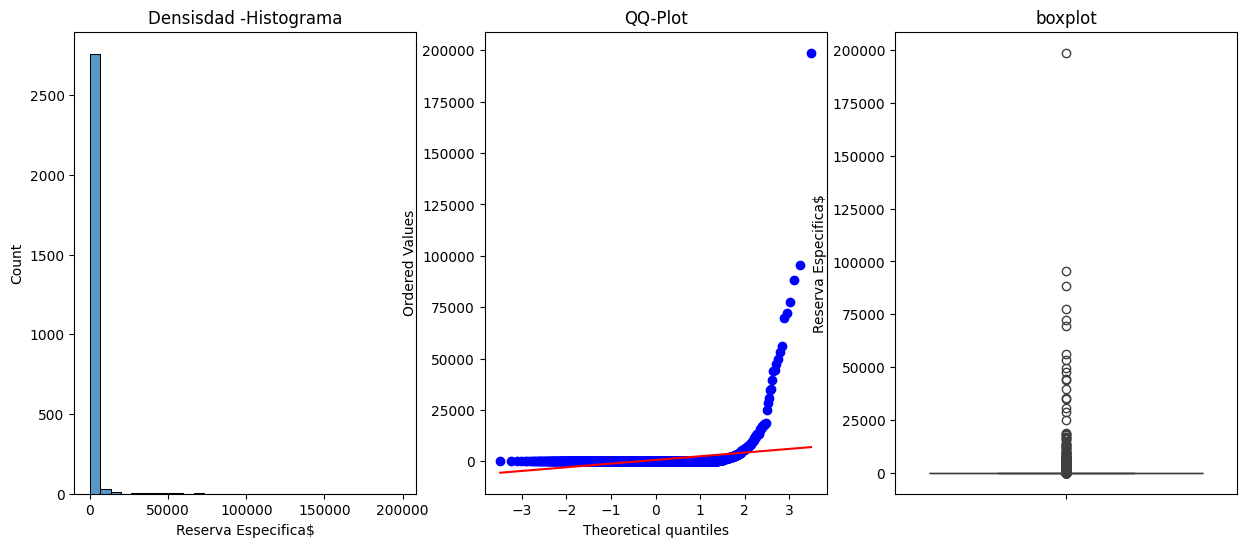

Reserva Especifica$_capp


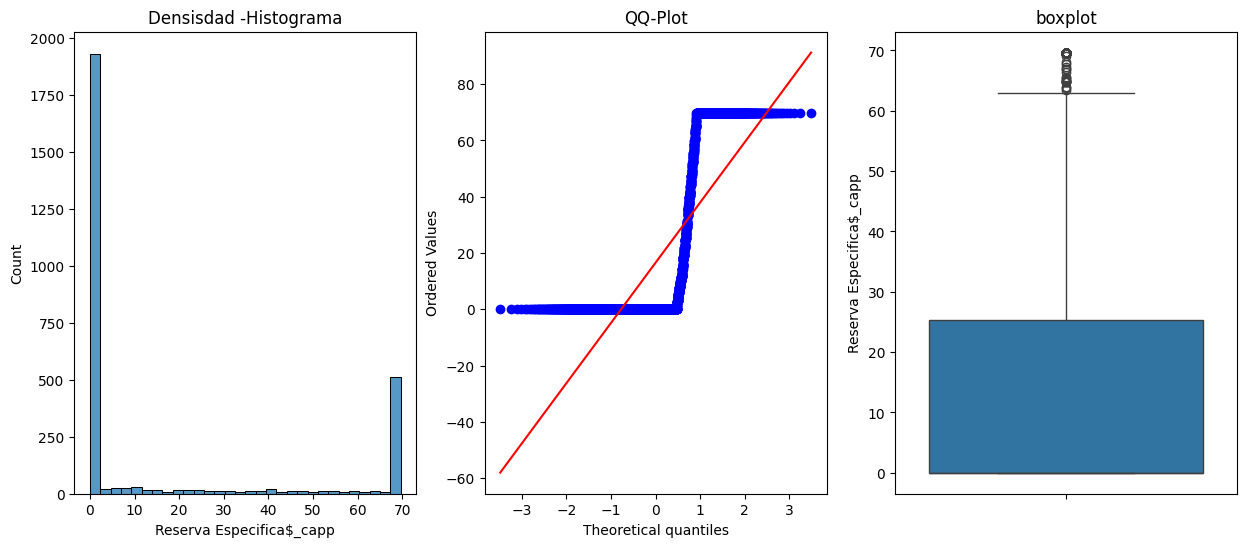

In [56]:
plot_outliers_analysis(df_loans, "Reserva Especifica$")
plot_outliers_analysis(df_loans, "Reserva Especifica$_capp")

#### 2.2 Método capping de final de cola para variable "Ab_24" (Tasa a abril 2024)

In [57]:
#Cálculo de IQR, limite inferior y límite superior
def get_outliers_limits(dataset, col):
    IQR = df_loans["Ab_24"].quantile(0.75) - df_loans["Ab_24"].quantile(0.25)
    LI = df_loans["Ab_24"].quantile(0.25)- (1.75*IQR)
    LS = df_loans["Ab_24"].quantile(0.75)+ (1.75*IQR)

    return LI,LS

In [58]:
get_outliers_limits(df_loans, "Ab_24")

(0.07750000000000001, 0.2125)

In [59]:
LI, LS = get_outliers_limits(df_loans,"Ab_24")

df_loans["Ab_24_capp"] = np.where(df_loans["Ab_24"]>LS, LS, np.where(df_loans["Ab_24"]<LI,LI,df_loans["Ab_24"]))

Ab_24


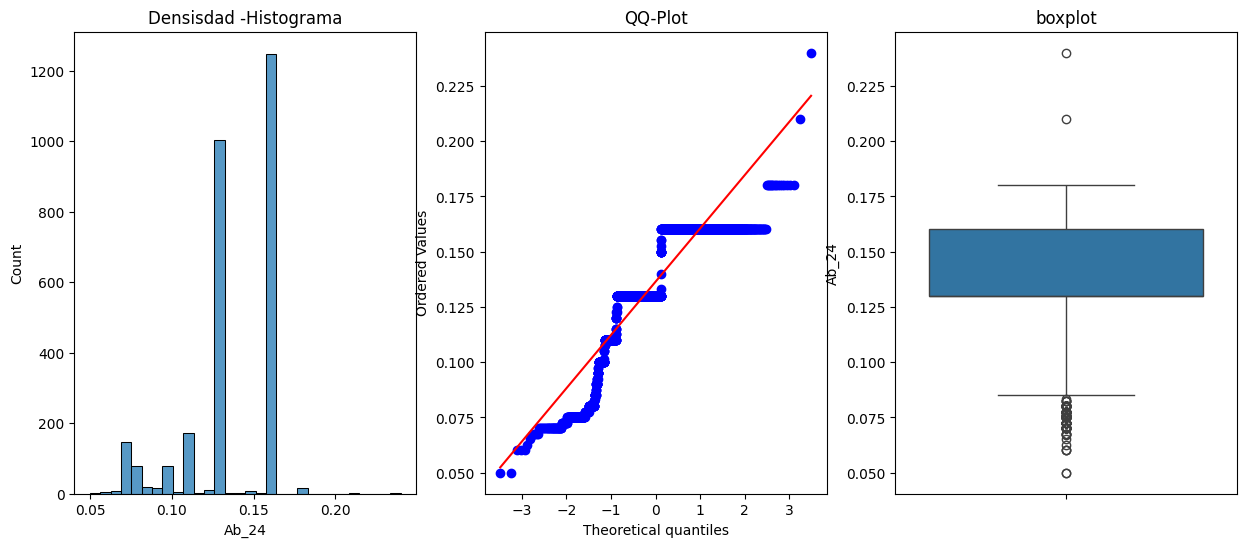

Ab_24_capp


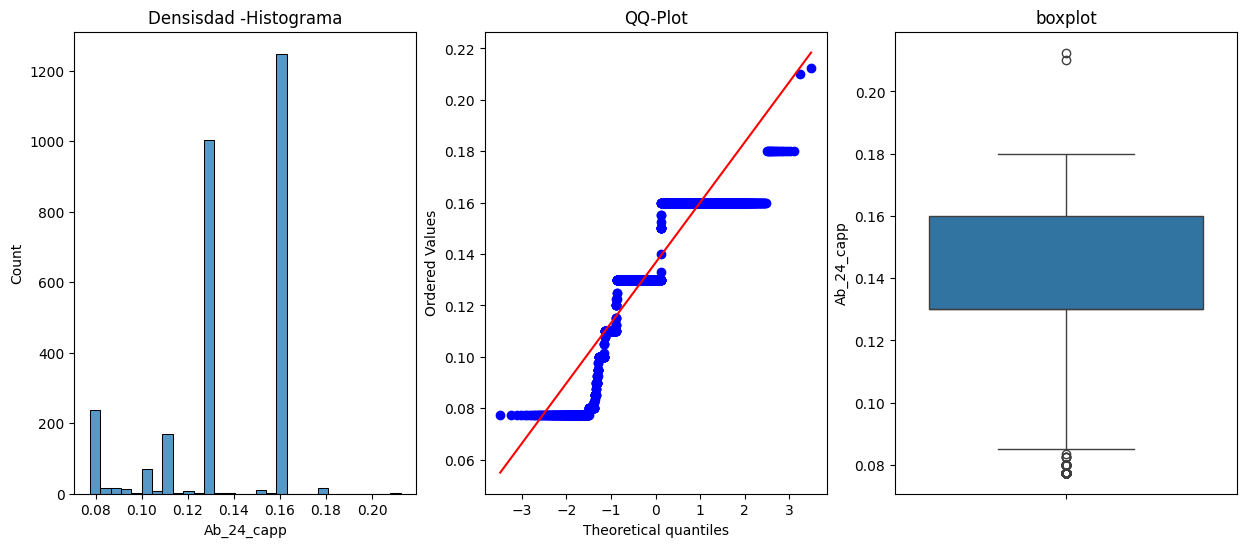

In [60]:
plot_outliers_analysis(df_loans, "Ab_24")
plot_outliers_analysis(df_loans, "Ab_24_capp")

#### 2.2 Método capping de final de cola para variable "Tasa_Propuesta"

Tasa_Propuesta


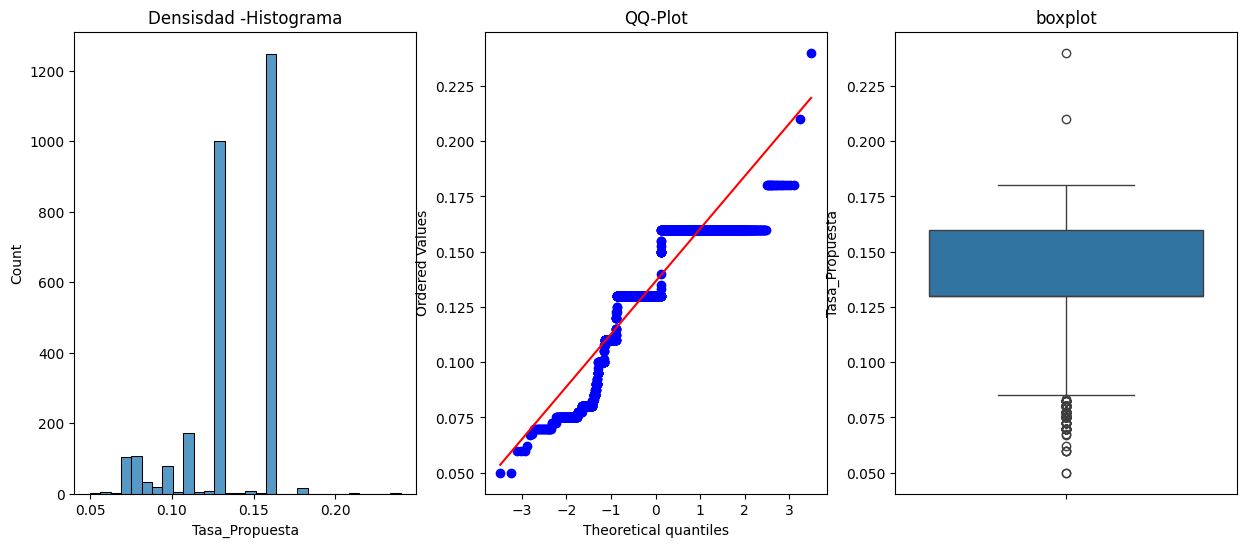

Tasa_Propuesta_capp


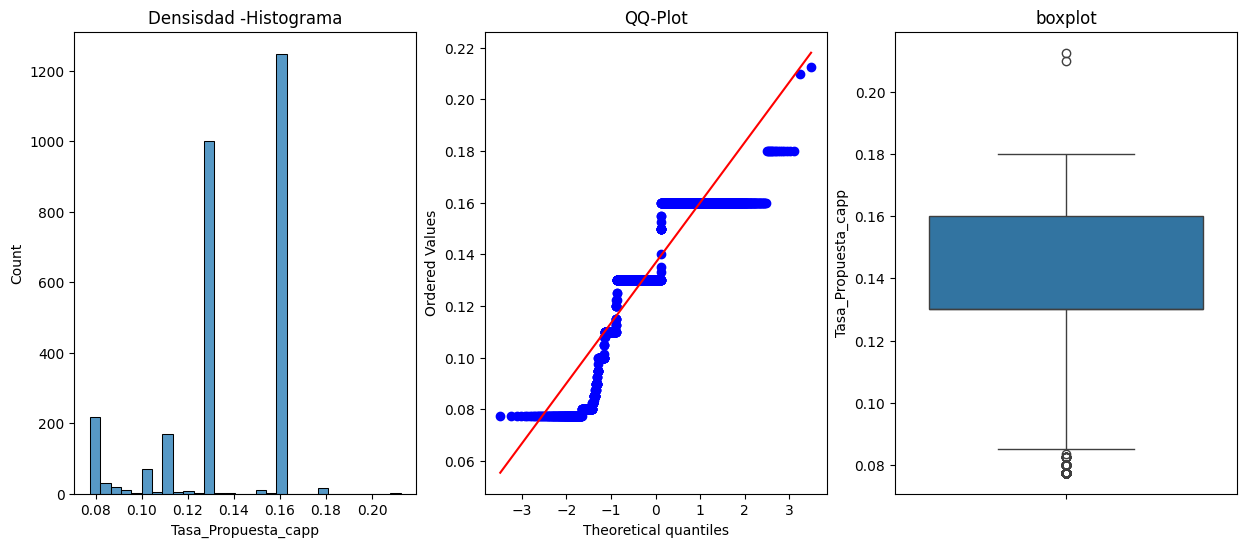

In [61]:
#Cálculo de IQR, limite inferior y límite superior
def get_outliers_limits(dataset, col):
    IQR = df_loans["Tasa_Propuesta"].quantile(0.75) - df_loans["Tasa_Propuesta"].quantile(0.25)
    LI = df_loans["Tasa_Propuesta"].quantile(0.25)- (1.75*IQR)
    LS = df_loans["Tasa_Propuesta"].quantile(0.75)+ (1.75*IQR)

    return LI,LS


get_outliers_limits(df_loans, "Tasa_Propuesta")


LI, LS = get_outliers_limits(df_loans,"Tasa_Propuesta")

df_loans["Tasa_Propuesta_capp"] = np.where(df_loans["Tasa_Propuesta"]>LS, LS, np.where(df_loans["Tasa_Propuesta"]<LI,LI,df_loans["Tasa_Propuesta"]))


plot_outliers_analysis(df_loans, "Tasa_Propuesta")
plot_outliers_analysis(df_loans, "Tasa_Propuesta_capp")

#### 2.2 Método capping de final de cola para variable "IntAnual_TasaPropuesta"

IntAnual_TasaPropuesta


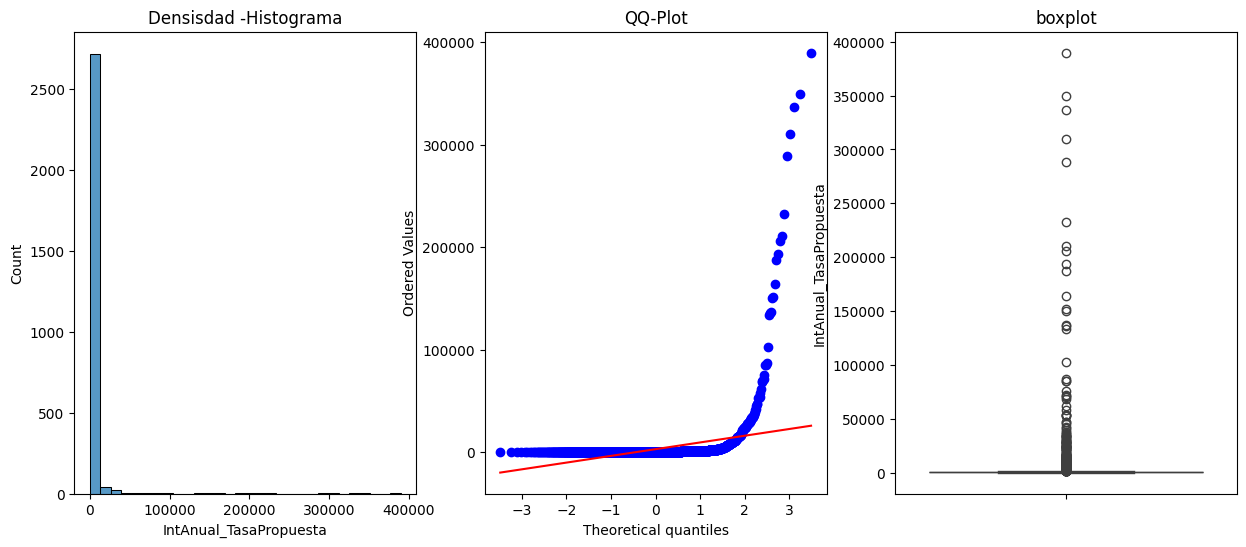

IntAnual_TasaPropuesta_capp


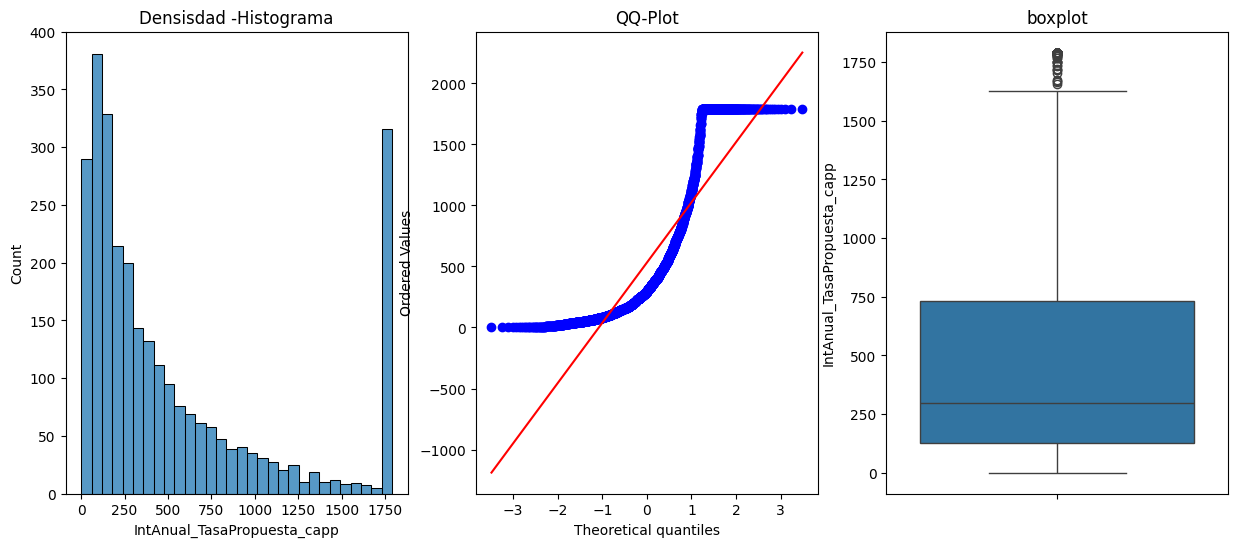

In [62]:
#Cálculo de IQR, limite inferior y límite superior
def get_outliers_limits(dataset, col):
    IQR = df_loans["IntAnual_TasaPropuesta"].quantile(0.75) - df_loans["IntAnual_TasaPropuesta"].quantile(0.25)
    LI = df_loans["IntAnual_TasaPropuesta"].quantile(0.25)- (1.75*IQR)
    LS = df_loans["IntAnual_TasaPropuesta"].quantile(0.75)+ (1.75*IQR)

    return LI,LS


get_outliers_limits(df_loans, "IntAnual_TasaPropuesta")


LI, LS = get_outliers_limits(df_loans,"IntAnual_TasaPropuesta")

df_loans["IntAnual_TasaPropuesta_capp"] = np.where(df_loans["IntAnual_TasaPropuesta"]>LS, LS, np.where(df_loans["IntAnual_TasaPropuesta"]<LI,LI,df_loans["IntAnual_TasaPropuesta"]))


plot_outliers_analysis(df_loans, "IntAnual_TasaPropuesta")
plot_outliers_analysis(df_loans, "IntAnual_TasaPropuesta_capp")

#### 2.2 Método capping de final de cola para variable "FTP"

FTP


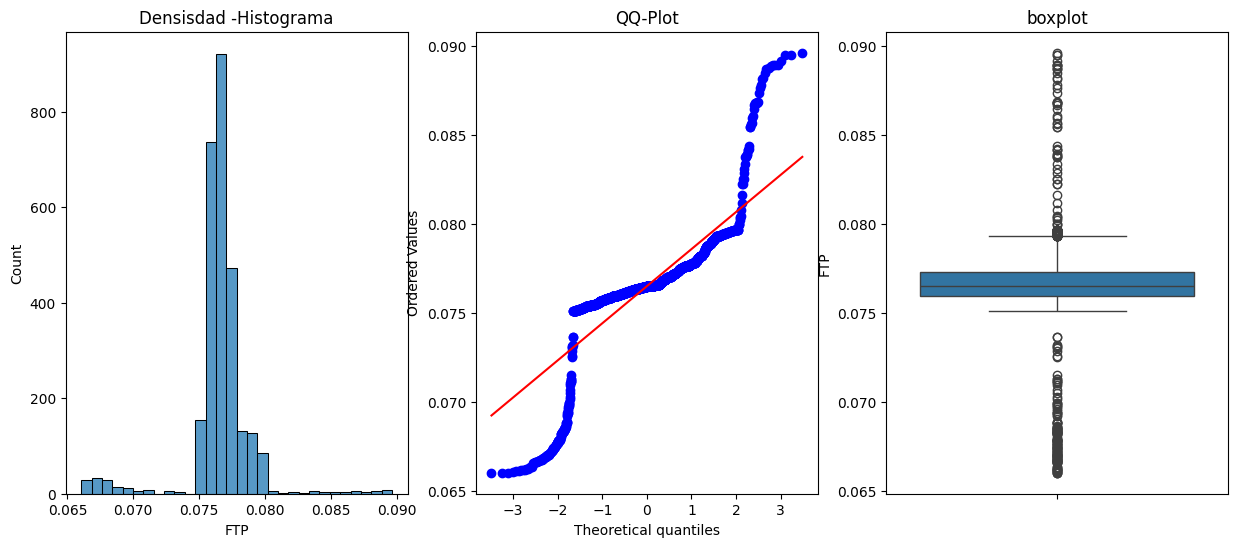

FTP_capp


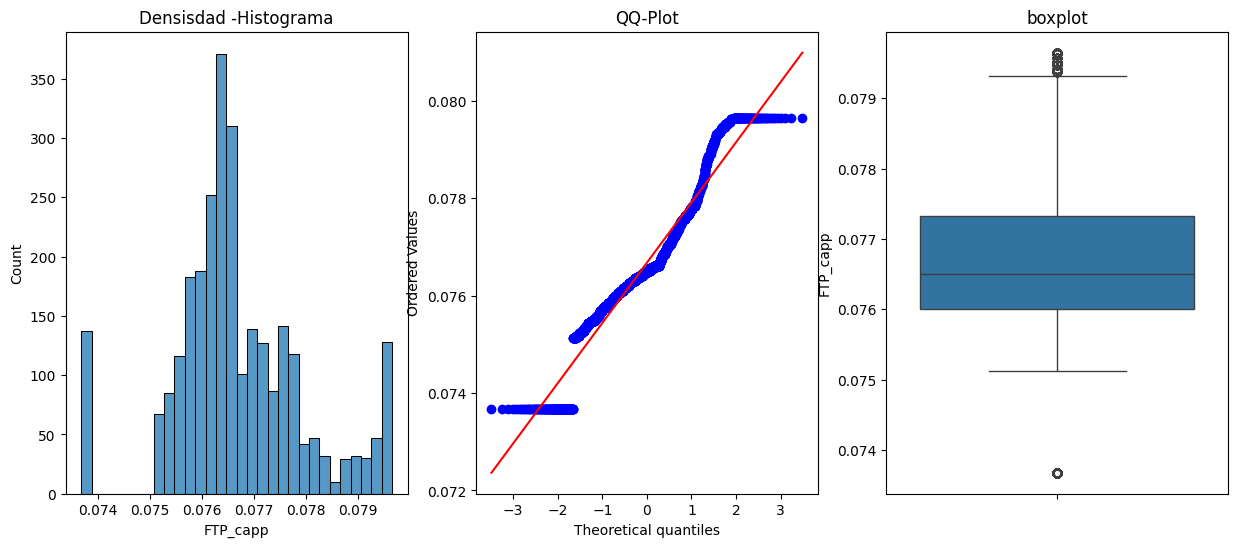

In [63]:
#Cálculo de IQR, limite inferior y límite superior
def get_outliers_limits(dataset, col):
    IQR = df_loans["FTP"].quantile(0.75) - df_loans["FTP"].quantile(0.25)
    LI = df_loans["FTP"].quantile(0.25)- (1.75*IQR)
    LS = df_loans["FTP"].quantile(0.75)+ (1.75*IQR)

    return LI,LS


get_outliers_limits(df_loans, "FTP")


LI, LS = get_outliers_limits(df_loans,"FTP")

df_loans["FTP_capp"] = np.where(df_loans["FTP"]>LS, LS, np.where(df_loans["FTP"]<LI,LI,df_loans["FTP"]))


plot_outliers_analysis(df_loans, "FTP")
plot_outliers_analysis(df_loans, "FTP_capp")

#### 2.2 Método capping de final de cola para variable "TIR"

TIR


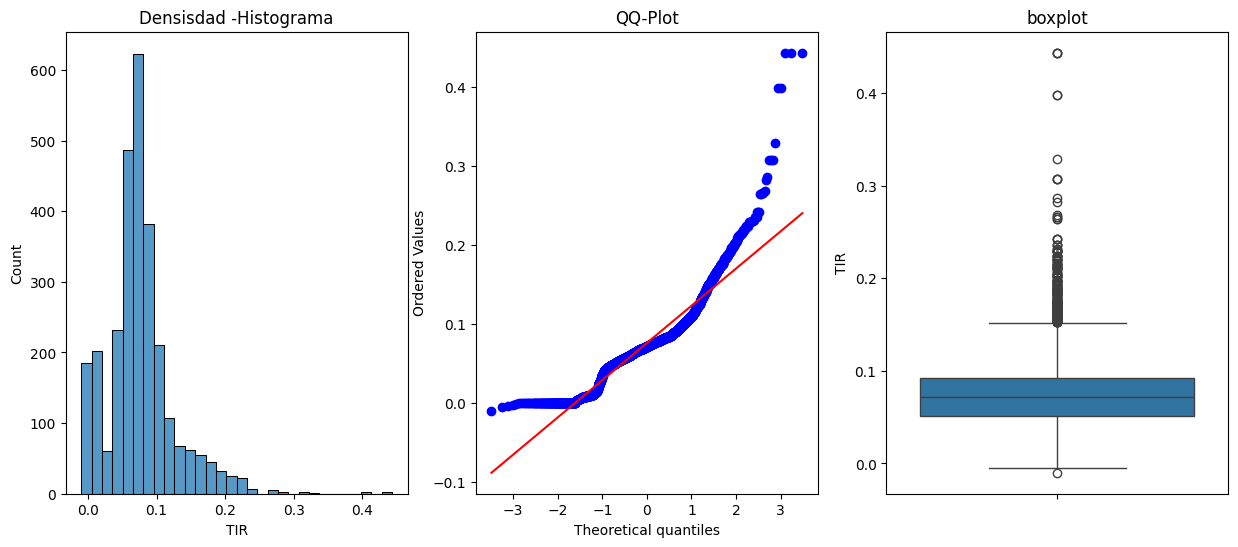

TIR_capp


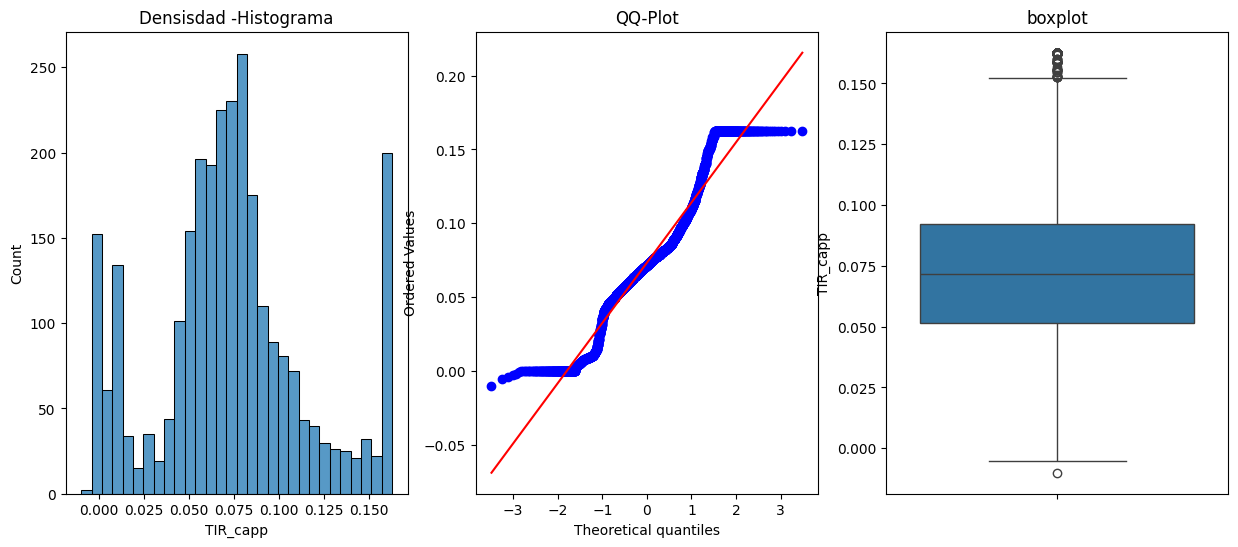

In [64]:
#Cálculo de IQR, limite inferior y límite superior
def get_outliers_limits(dataset, col):
    IQR = df_loans["TIR"].quantile(0.75) - df_loans["TIR"].quantile(0.25)
    LI = df_loans["TIR"].quantile(0.25)- (1.75*IQR)
    LS = df_loans["TIR"].quantile(0.75)+ (1.75*IQR)

    return LI,LS


get_outliers_limits(df_loans, "TIR")


LI, LS = get_outliers_limits(df_loans,"TIR")

df_loans["TIR_capp"] = np.where(df_loans["TIR"]>LS, LS, np.where(df_loans["TIR"]<LI,LI,df_loans["TIR"]))


plot_outliers_analysis(df_loans, "TIR")
plot_outliers_analysis(df_loans, "TIR_capp")

# 9. Transformación de variables

### Transformación de variables con el fin de normalizar lo más posible la distribución de probabilidad de cada variable y mejorar el rendimiento del modelo

In [65]:
#revisión de variables continuas nuevas con el método de capping de final de cola
cat, cont, disct = get_variables_scale(df_loans)

Variables Categóricas:
[]

Variables Continuas:
['Saldo$', 'PE_30.04.2024', 'PD_MAX_2024_04_30', 'PlazoRestante(Dias)', 'Reserva Especifica$', 'Ab_24', 'Tasa_Propuesta', 'IntAnual_TasaPropuesta', 'FTP', 'TIR', 'Saldo$_capp', 'PE_30.04.2024_capp', 'PlazoRestante(Dias)_capp', 'Reserva Especifica$_capp', 'Tasa_Propuesta_capp', 'IntAnual_TasaPropuesta_capp', 'FTP_capp', 'TIR_capp']

Variables Discretas:
['LGD_MAX_2024_04_30', 'bps%', 'Tasa_Costo_Oportunidad', 'Código Moneda', 'Status Mora', 'Nuevo', 'PD_MAX_2024_04_30_capp', 'Ab_24_capp']


In [66]:
def plot_density_qq(df, variable):

    plt.figure(figsize = (10,6))

    plt.subplot(121)
    df[variable].hist(bins = 30)
    plt.title(variable)

    plt.subplot(122)
    stats.probplot(df[variable], dist = 'norm', plot = plt)
    plt.show()

#### Transformación de variable Saldo$_capp

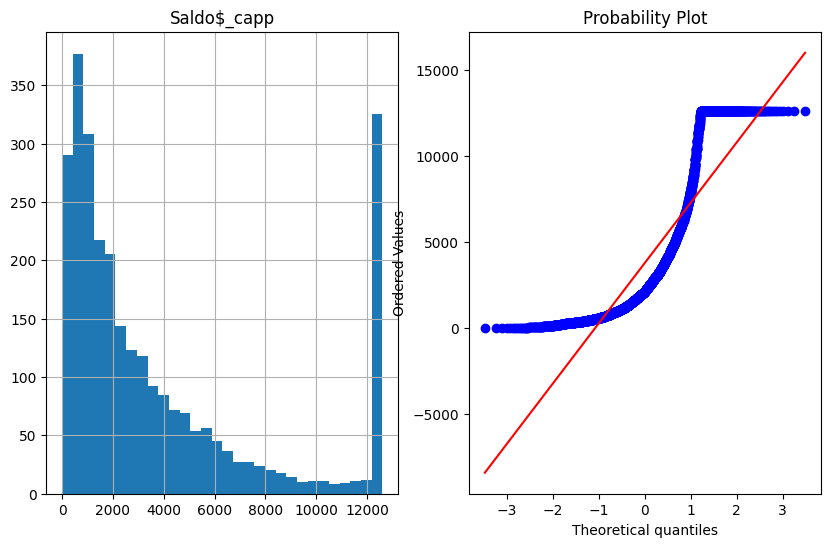

In [67]:
col = 'Saldo$_capp'
plot_density_qq(df_loans, col)

### Transformación polinomial de orden 2

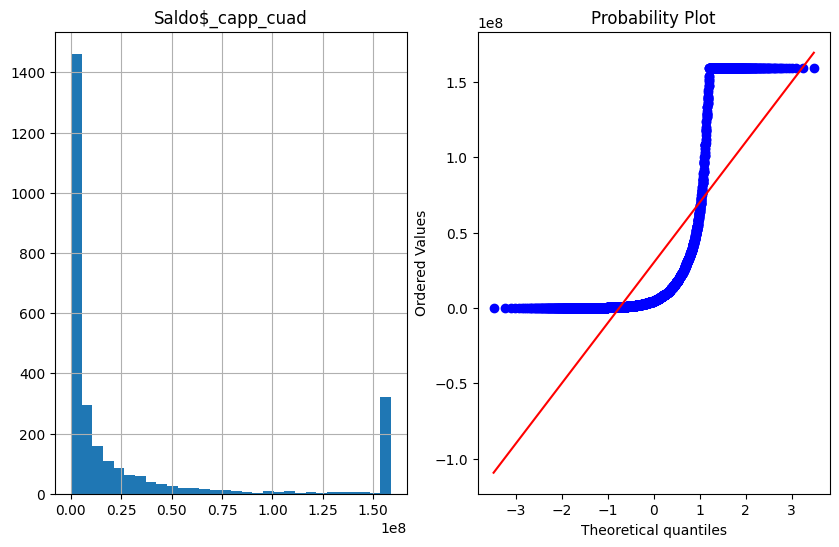

In [68]:
df_loans[col + '_cuad'] = (df_loans[col])**2
plot_density_qq(df_loans,col + '_cuad')

#### Transformación de variable PE_30.04.2024_capp

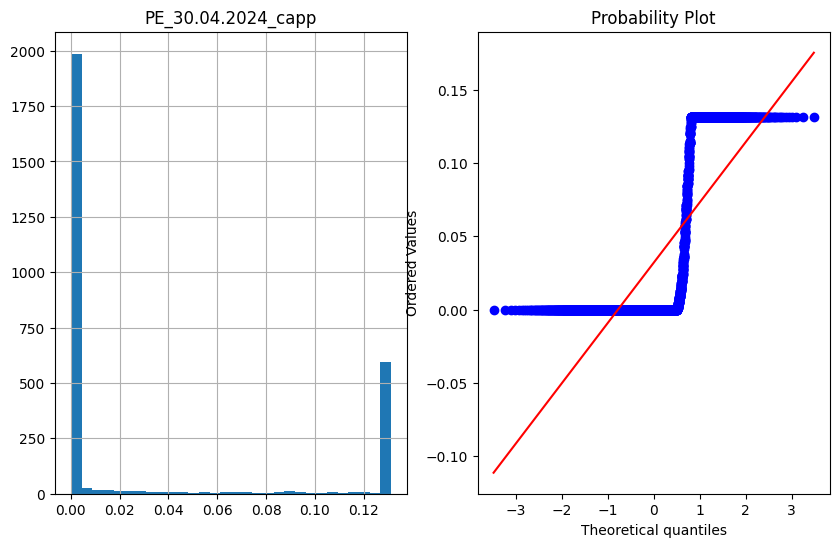

In [69]:
col = 'PE_30.04.2024_capp'
plot_density_qq(df_loans, col)

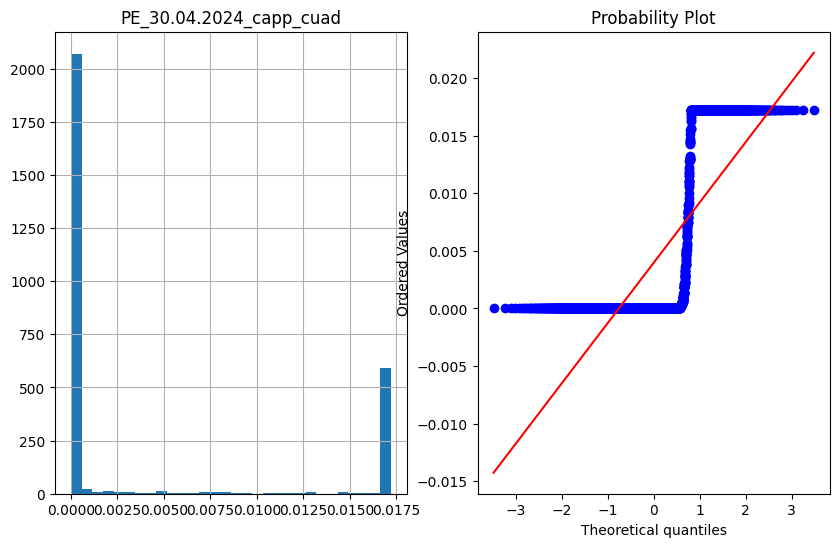

In [70]:
# Transformación polinomial de orden 2
df_loans[col + '_cuad'] = (df_loans[col])**2
plot_density_qq(df_loans,col + '_cuad')

#### Transformación variable PlazoRestante(Dias)_capp

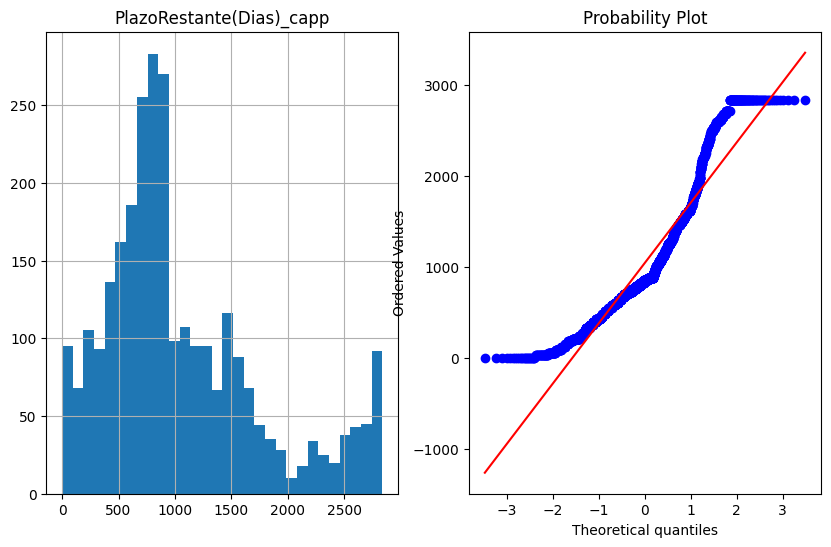

In [71]:
col = 'PlazoRestante(Dias)_capp'
plot_density_qq(df_loans, col)

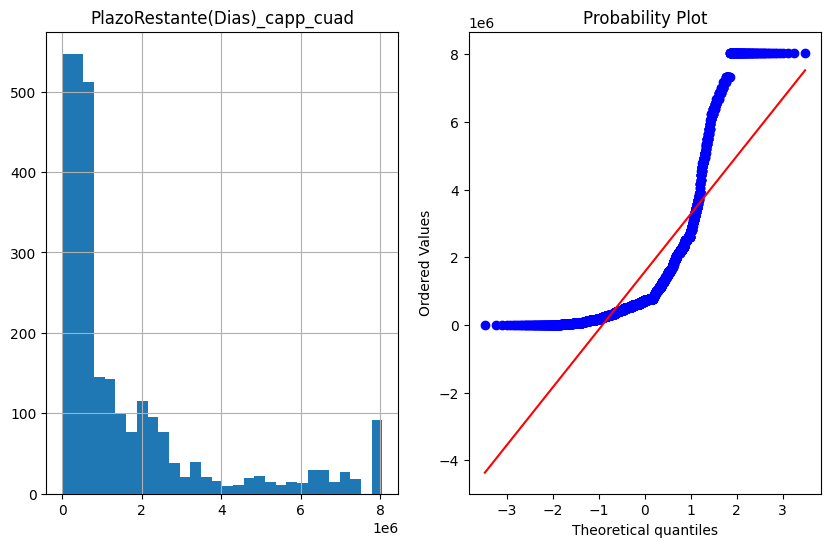

In [72]:
# Transformación polinomial de orden 2
df_loans[col + '_cuad'] = (df_loans[col])**2
plot_density_qq(df_loans,col + '_cuad')

#### Transformación variable Reserva Especifica$_capp

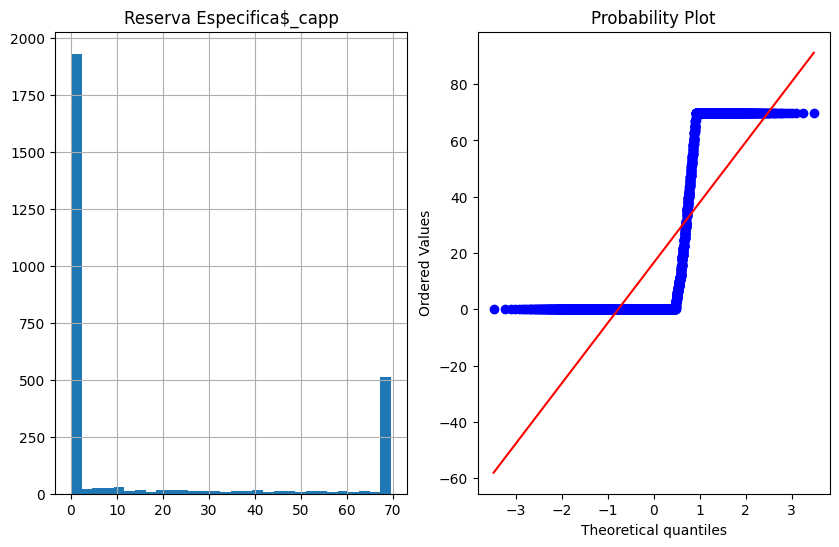

In [73]:
col = 'Reserva Especifica$_capp'
plot_density_qq(df_loans, col)

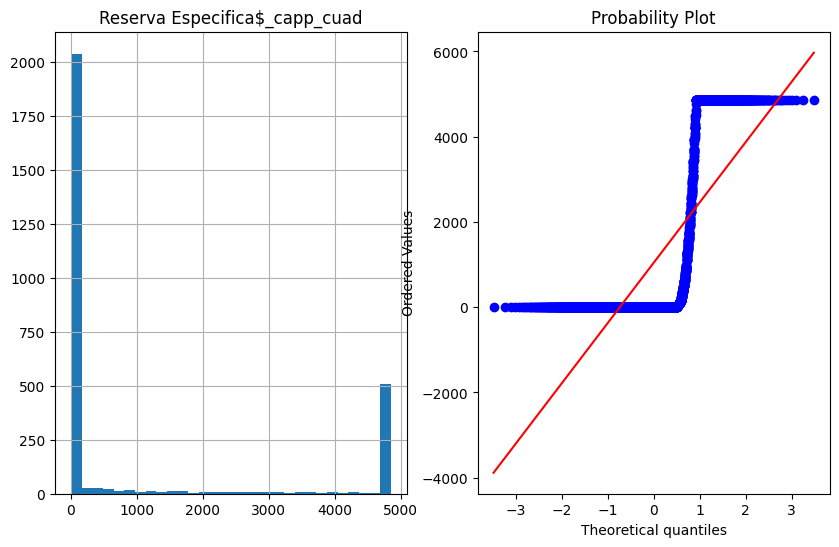

In [74]:
# Transformación polinomial de orden 2
df_loans[col + '_cuad'] = (df_loans[col])**2
plot_density_qq(df_loans,col + '_cuad')

#### Transformación variable Tasa_Propuesta_capp

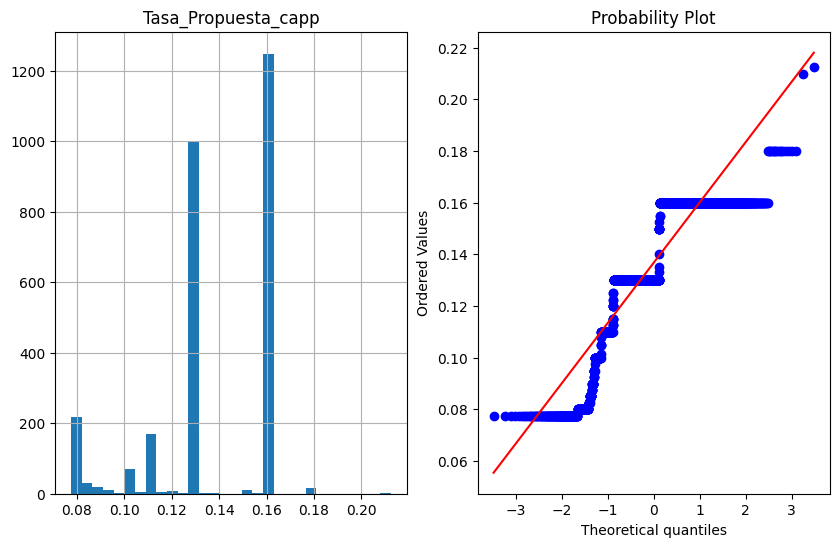

In [75]:
col = 'Tasa_Propuesta_capp'
plot_density_qq(df_loans, col)

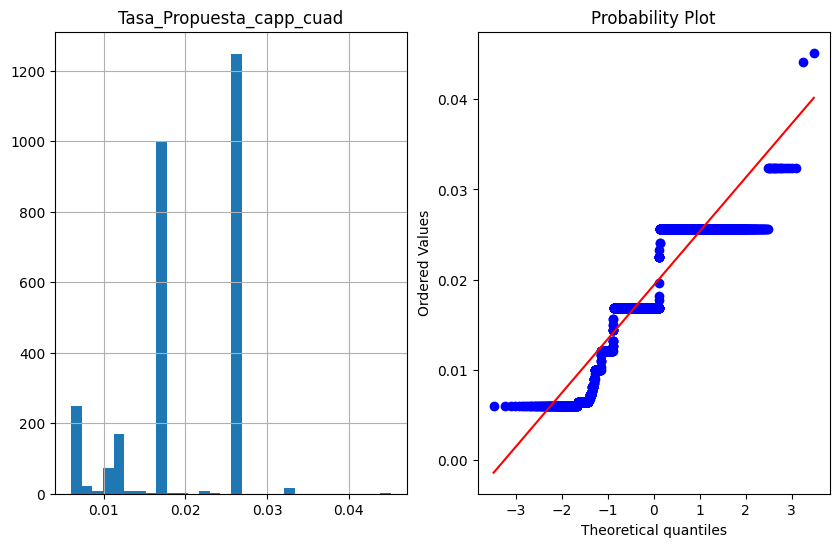

In [76]:
# Transformación polinomial de orden 2
df_loans[col + '_cuad'] = (df_loans[col])**2
plot_density_qq(df_loans,col + '_cuad')

#### Transformación de variable IntAnual_TasaPropuesta_capp

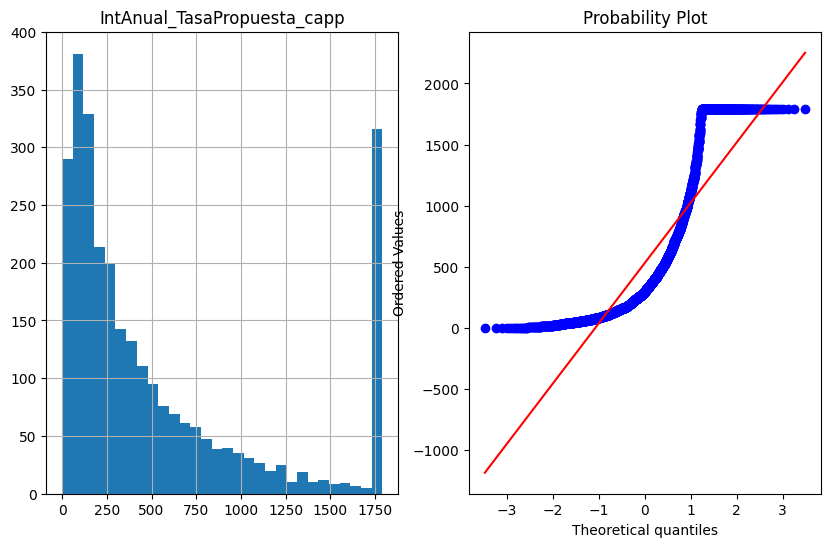

In [77]:
col = 'IntAnual_TasaPropuesta_capp'
plot_density_qq(df_loans, col)

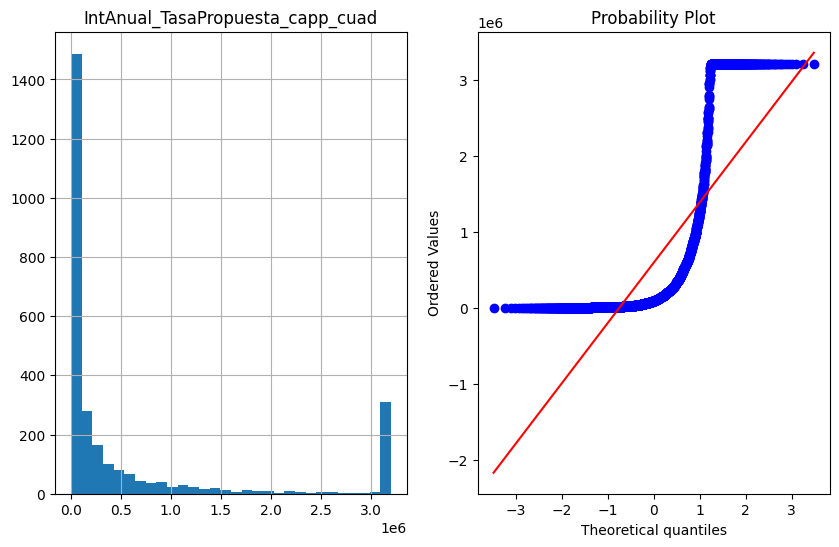

In [78]:
# Transformación polinomial de orden 2
df_loans[col + '_cuad'] = (df_loans[col])**2
plot_density_qq(df_loans,col + '_cuad')

#### Transformación de variable FTP_capp

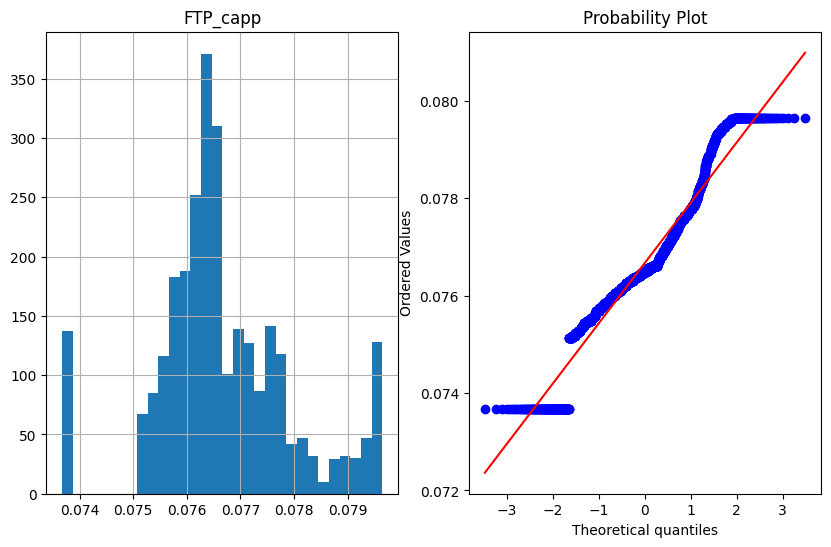

In [79]:
col = 'FTP_capp'
plot_density_qq(df_loans, col)

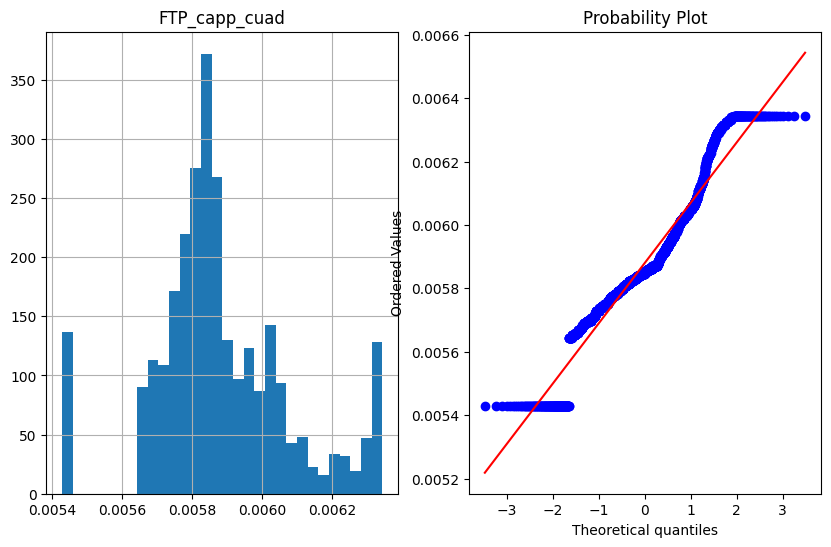

In [80]:
# Transformación polinomial de orden 2
df_loans[col + '_cuad'] = (df_loans[col])**2
plot_density_qq(df_loans,col + '_cuad')

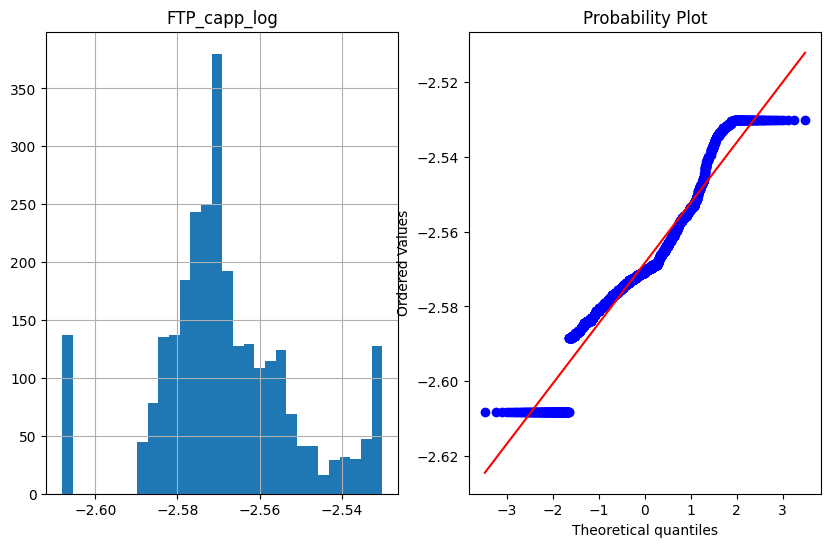

In [81]:
#Transformación logaritmica de FTP_capp
df_loans[col + '_log'] = np.log(df_loans[col])
plot_density_qq(df_loans,col + '_log')

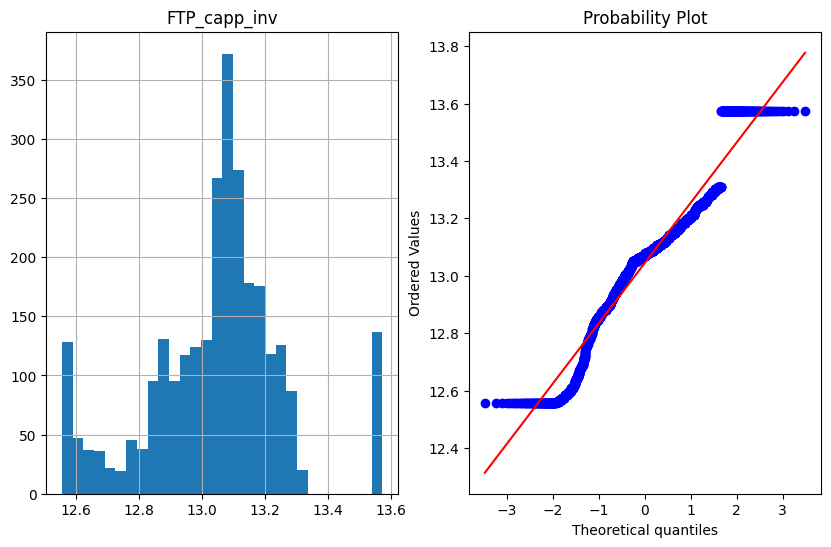

In [82]:
#Transformación logaritmica inversa de FTP_capp
df_loans[col + '_inv'] = 1/(df_loans[col])
plot_density_qq(df_loans,col + '_inv')

-2.7517


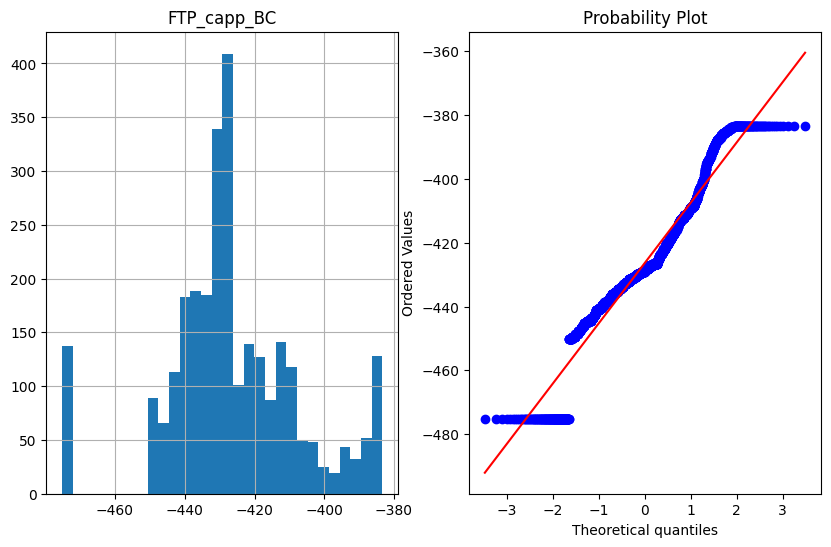

In [83]:
#BoxCox
df_loans[col + '_BC'], lmbd = stats.boxcox(df_loans[col])
lmbd = str(round(lmbd,4))
print(lmbd)
plot_density_qq(df_loans, col + '_BC')

-2.7517


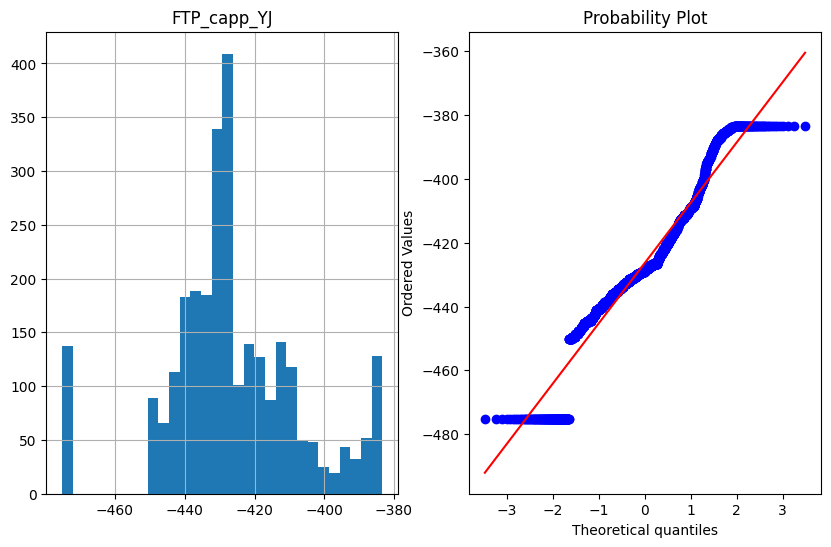

In [84]:
#Yeo-Johnson
df_loans[col + '_YJ'], lmbd = stats.boxcox(df_loans[col])
lmbd = str(round(lmbd,4))
print(lmbd)
plot_density_qq(df_loans, col + '_YJ')

#### Transformación variable TIR_capp

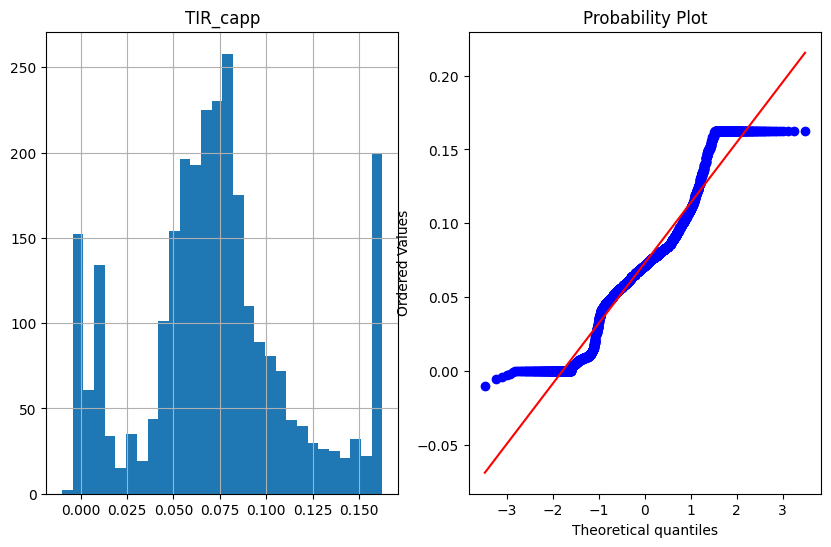

In [85]:
col = 'TIR_capp'
plot_density_qq(df_loans, col)

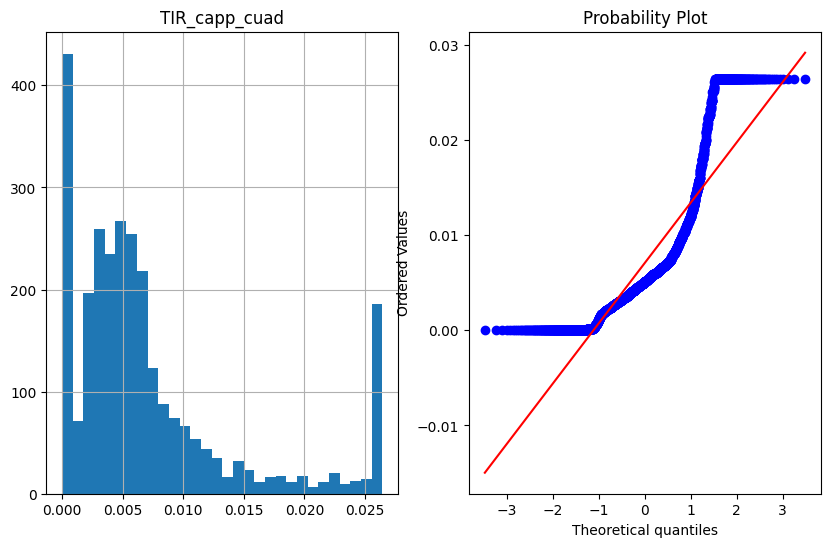

In [86]:
# Transformación polinomial de orden 2
df_loans[col + '_cuad'] = (df_loans[col])**2
plot_density_qq(df_loans,col + '_cuad')

# 10. Feature Scaling para todo el dataset con las transformaciones aplicadas

In [87]:
df_loans.head()

,Desembolso,Vencimiento,Saldo$,FechaReporte,PE_30.04.2024,PD_MAX_2024_04_30,LGD_MAX_2024_04_30,PlazoRestante(Dias),Reserva Especifica$,Ab_24,...,PlazoRestante(Dias)_capp_cuad,Reserva Especifica$_capp_cuad,Tasa_Propuesta_capp_cuad,IntAnual_TasaPropuesta_capp_cuad,FTP_capp_cuad,FTP_capp_log,FTP_capp_inv,FTP_capp_BC,FTP_capp_YJ,TIR_capp_cuad
0,2022-08-02,2037-04-30,3724668.653,2024-04-30,99427.84220,0.075018,0.3500,4748,72351.20216,0.0750,...,8.047151e+06,4851.418013,0.006006,3.205432e+06,0.006344,-2.530121,12.555022,-383.347027,-383.347027,0.000037
1,2022-09-12,2039-02-28,2902574.199,2024-04-30,100418.02520,0.097223,0.3500,5417,56339.50477,0.0775,...,8.047151e+06,4851.418013,0.006400,3.205432e+06,0.006344,-2.530121,12.555022,-383.347027,-383.347027,0.000066
2,2023-10-23,2026-05-25,2573399.796,2024-04-30,50873.84772,0.097223,0.2000,755,49795.28605,0.0750,...,5.700250e+05,4851.418013,0.006400,3.205432e+06,0.005836,-2.571824,13.089677,-430.005307,-430.005307,0.000031
3,2023-07-17,2028-07-17,2272312.020,2024-04-30,12008.44648,0.014032,0.3796,1539,43969.23758,0.0850,...,2.368521e+06,4851.418013,0.007225,3.205432e+06,0.006039,-2.554745,12.868024,-410.248171,-410.248171,0.000100
4,2023-11-23,2026-05-25,1707450.764,2024-04-30,33754.79796,0.097223,0.2000,755,28521.49497,0.0750,...,5.700250e+05,4851.418013,0.006400,3.205432e+06,0.005836,-2.571824,13.089677,-430.005307,-430.005307,0.000031


In [88]:
df_loans.describe()

,Desembolso,Vencimiento,Saldo$,FechaReporte,PE_30.04.2024,PD_MAX_2024_04_30,LGD_MAX_2024_04_30,PlazoRestante(Dias),Reserva Especifica$,Ab_24,...,PlazoRestante(Dias)_capp_cuad,Reserva Especifica$_capp_cuad,Tasa_Propuesta_capp_cuad,IntAnual_TasaPropuesta_capp_cuad,FTP_capp_cuad,FTP_capp_log,FTP_capp_inv,FTP_capp_BC,FTP_capp_YJ,TIR_capp_cuad
count,2819,2819,2.819000e+03,2819,2819.000000,2819.000000,2819.000000,2819.000000,2819.000000,2819.000000,...,2.819000e+03,2819.000000,2819.000000,2.819000e+03,2819.000000,2819.000000,2819.000000,2819.000000,2819.000000,2819.000000
mean,2022-07-21 18:40:13.621851648,2027-06-08 06:11:21.943951616,3.369585e+04,2024-04-29 23:59:59.999999744,482.136592,0.020896,0.061518,1139.656971,708.978425,0.136403,...,1.578362e+06,1043.592672,0.019371,5.923159e+05,0.005881,-2.568299,13.045404,-426.292418,-426.292418,0.007116
min,2007-08-29 00:00:00,2017-02-28 00:00:00,0.000000e+00,2024-04-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,...,0.000000e+00,0.000000,0.006006,0.000000e+00,0.005428,-2.608094,12.555022,-475.174352,-475.174352,0.000000
25%,2022-01-19 00:00:00,2025-11-30 00:00:00,8.893760e+02,2024-04-30 00:00:00,0.000000,0.008579,0.009000,579.000000,0.000000,0.130000,...,3.352410e+05,0.000000,0.016900,1.574676e+04,0.005776,-2.577045,12.932268,-436.232482,-436.232482,0.002672
50%,2022-11-30 00:00:00,2026-08-31 00:00:00,2.140773e+03,2024-04-30 00:00:00,0.000000,0.008579,0.009000,853.000000,0.000000,0.130000,...,7.276090e+05,0.000000,0.016900,8.764175e+04,0.005854,-2.570353,13.070437,-428.266861,-428.266861,0.005127
75%,2023-05-23 00:00:00,2028-02-29 00:00:00,5.149982e+03,2024-04-30 00:00:00,0.047715,0.008579,0.009000,1400.000000,25.328044,0.160000,...,1.960000e+06,641.511906,0.025600,5.342136e+05,0.005979,-2.559726,13.158193,-415.913800,-415.913800,0.008468
max,2024-04-30 00:00:00,2047-12-31 00:00:00,5.197960e+06,2024-04-30 00:00:00,100418.025200,1.000000,0.588600,8645.000000,198782.310900,0.240000,...,8.047151e+06,4851.418013,0.045156,3.205432e+06,0.006344,-2.530121,13.573156,-383.347027,-383.347027,0.026441
std,NaN,NaN,2.363706e+05,NaN,4637.467568,0.104000,0.149677,1077.778820,5939.157617,0.026699,...,2.023989e+06,1896.742682,0.006553,1.025705e+06,0.000195,0.016557,0.215698,19.378494,19.378494,0.007094


### Scaling para TIR y Saldo$

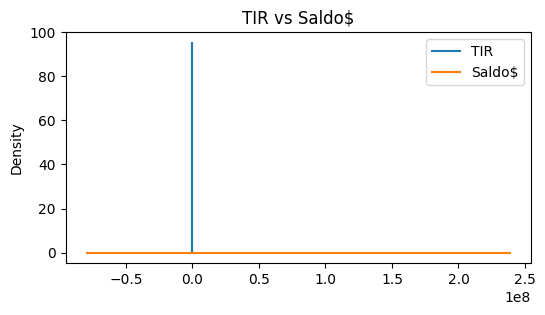

In [89]:
fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(111)
df_loans['TIR_capp_cuad'].plot(kind='kde', ax=ax, label='TIR')
df_loans['Saldo$_capp_cuad'].plot(kind='kde', ax=ax, label='Saldo$')
plt.title("TIR vs Saldo$")

plt.legend()
plt.show()

In [90]:
min_if = df_loans['TIR_capp_cuad'].min()
max_if = df_loans['TIR'].max()

df_loans['TIR_capp_cuad_minMaxScaled'] = (df_loans['TIR'] - min_if)/(max_if - min_if)

In [91]:
min_if = df_loans['Saldo$_capp_cuad'].min()
max_if = df_loans['Saldo$'].max()

df_loans['Saldo$_capp_cuad_minMaxScaled'] = (df_loans['Saldo$'] - min_if)/(max_if - min_if)

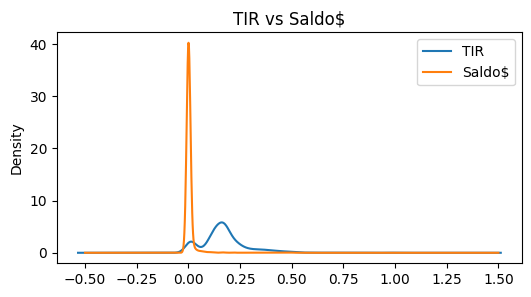

In [92]:
fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(111)
df_loans['TIR_capp_cuad_minMaxScaled'].plot(kind='kde', ax=ax, label='TIR')
df_loans['Saldo$_capp_cuad_minMaxScaled'].plot(kind='kde', ax=ax, label='Saldo$')
plt.title("TIR vs Saldo$")

plt.legend()
plt.show()

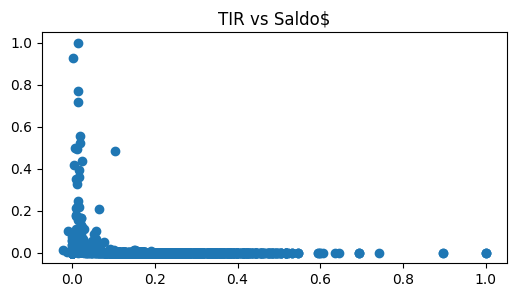

In [93]:
fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(111)
plt.scatter(x=df_loans['TIR_capp_cuad_minMaxScaled'], y = df_loans['Saldo$_capp_cuad_minMaxScaled'])
plt.title("TIR vs Saldo$")


plt.show()

### Scaling para FTP vs Tasa propuesta

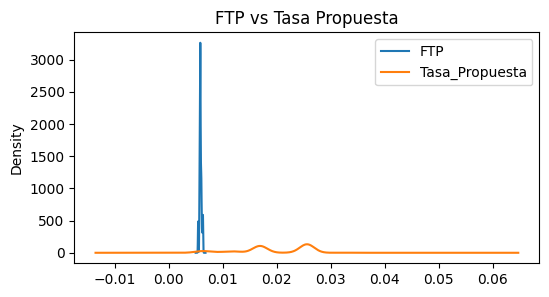

In [94]:
fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(111)
df_loans['FTP_capp_cuad'].plot(kind='kde', ax=ax, label='FTP')
df_loans['Tasa_Propuesta_capp_cuad'].plot(kind='kde', ax=ax, label='Tasa_Propuesta')
plt.title("FTP vs Tasa Propuesta")

plt.legend()
plt.show()

In [95]:
min_if = df_loans['FTP_capp_cuad'].min()
max_if = df_loans['FTP'].max()

df_loans['FTP_capp_cuad_minMaxScaled'] = (df_loans['FTP'] - min_if)/(max_if - min_if)

In [96]:
min_if = df_loans['Tasa_Propuesta_capp_cuad'].min()
max_if = df_loans['Tasa_Propuesta'].max()

df_loans['Tasa_Propuesta_capp_cuad_minMaxScaled'] = (df_loans['Tasa_Propuesta'] - min_if)/(max_if - min_if)

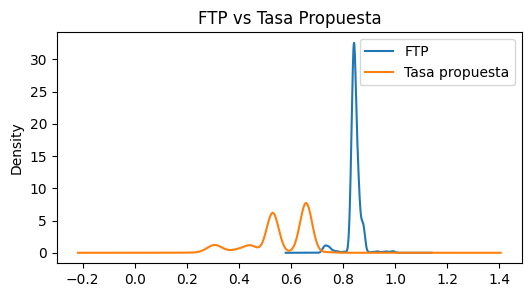

In [97]:
fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(111)
df_loans['FTP_capp_cuad_minMaxScaled'].plot(kind='kde', ax=ax, label='FTP')
df_loans['Tasa_Propuesta_capp_cuad_minMaxScaled'].plot(kind='kde', ax=ax, label='Tasa propuesta')
plt.title("FTP vs Tasa Propuesta")

plt.legend()
plt.show()

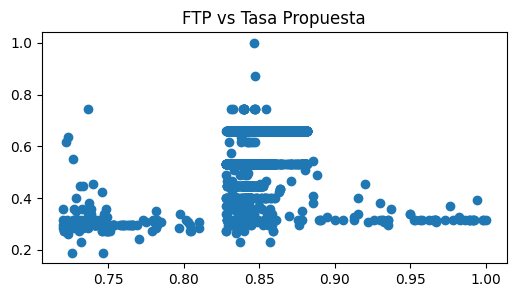

In [98]:
fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(111)
plt.scatter(x=df_loans['FTP_capp_cuad_minMaxScaled'], y = df_loans['Tasa_Propuesta_capp_cuad_minMaxScaled'])
plt.title("FTP vs Tasa Propuesta")


plt.show()

### Scaling para Reserva Específica con Pérdida esperada

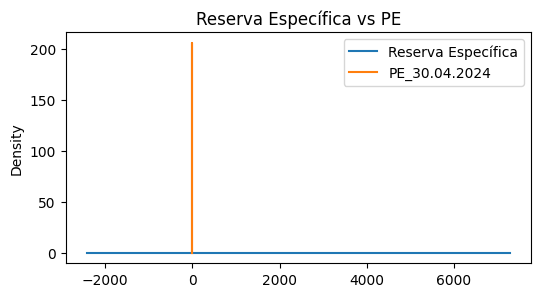

In [100]:
fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(111)
df_loans['Reserva Especifica$_capp_cuad'].plot(kind='kde', ax=ax, label='Reserva Específica')
df_loans['PE_30.04.2024_capp_cuad'].plot(kind='kde', ax=ax, label='PE_30.04.2024')
plt.title("Reserva Específica vs PE")

plt.legend()
plt.show()

In [101]:
min_if = df_loans['Reserva Especifica$_capp_cuad'].min()
max_if = df_loans['Reserva Especifica$'].max()

df_loans['Reserva Especifica$_capp_cuad_minMaxScaled'] = (df_loans['Reserva Especifica$'] - min_if)/(max_if - min_if)

In [102]:
min_if = df_loans['PE_30.04.2024_capp_cuad'].min()
max_if = df_loans['PE_30.04.2024'].max()

df_loans['PE_30.04.2024_capp_cuad_minMaxScaled'] = (df_loans['PE_30.04.2024'] - min_if)/(max_if - min_if)

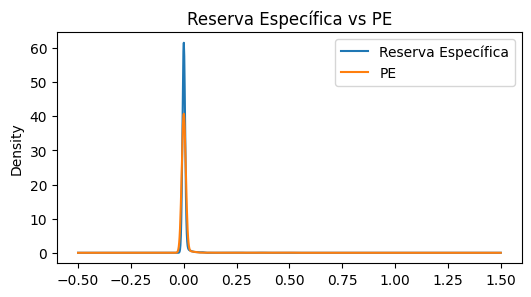

In [103]:
fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(111)
df_loans['Reserva Especifica$_capp_cuad_minMaxScaled'].plot(kind='kde', ax=ax, label='Reserva Específica')
df_loans['PE_30.04.2024_capp_cuad_minMaxScaled'].plot(kind='kde', ax=ax, label='PE')
plt.title("Reserva Específica vs PE")

plt.legend()
plt.show()

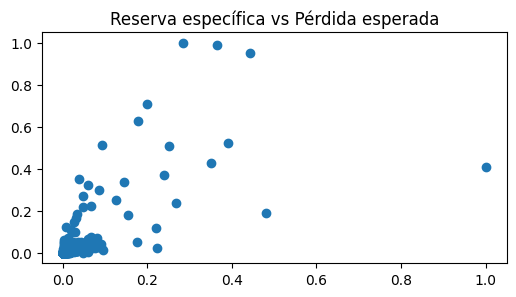

In [104]:
fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(111)
plt.scatter(x=df_loans['Reserva Especifica$_capp_cuad_minMaxScaled'], y = df_loans['PE_30.04.2024_capp_cuad_minMaxScaled'])
plt.title("Reserva específica vs Pérdida esperada")


plt.show()

### Scaling para FTP vs PlazoRestante(Dias)

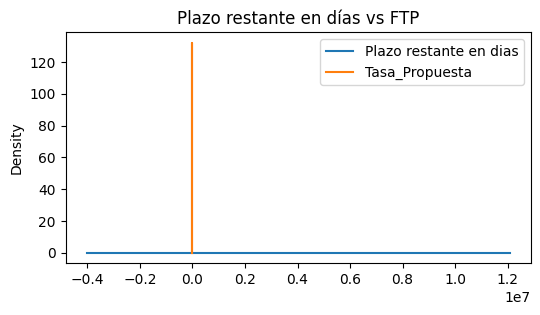

In [105]:
fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(111)
df_loans['PlazoRestante(Dias)_capp_cuad'].plot(kind='kde', ax=ax, label='Plazo restante en dias')
df_loans['Tasa_Propuesta_capp_cuad'].plot(kind='kde', ax=ax, label='Tasa_Propuesta')
plt.title("Plazo restante en días vs FTP")

plt.legend()
plt.show()

In [106]:
min_if = df_loans['PlazoRestante(Dias)_capp_cuad'].min()
max_if = df_loans['PlazoRestante(Dias)'].max()

df_loans['PlazoRestante(Dias)_capp_cuad_minMaxScaled'] = (df_loans['PlazoRestante(Dias)'] - min_if)/(max_if - min_if)

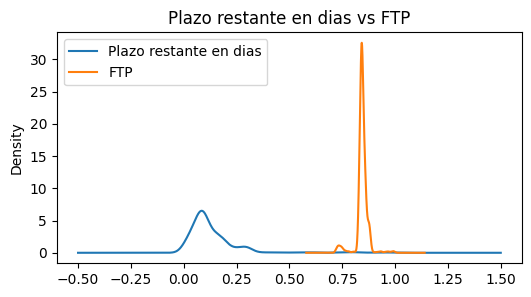

In [107]:
fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(111)
df_loans['PlazoRestante(Dias)_capp_cuad_minMaxScaled'].plot(kind='kde', ax=ax, label='Plazo restante en dias')
df_loans['FTP_capp_cuad_minMaxScaled'].plot(kind='kde', ax=ax, label='FTP')
plt.title("Plazo restante en dias vs FTP")

plt.legend()
plt.show()

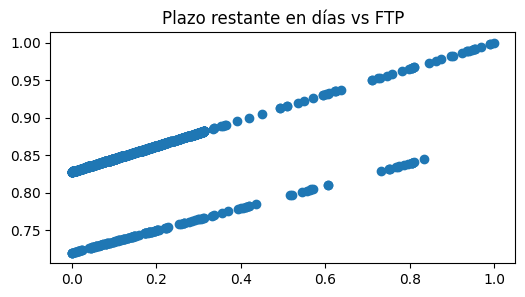

In [108]:
fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(111)
plt.scatter(x=df_loans['PlazoRestante(Dias)_capp_cuad_minMaxScaled'], y = df_loans['FTP_capp_cuad_minMaxScaled'])
plt.title("Plazo restante en días vs FTP")


plt.show()

# 11. Consolidación de dataset y generación de archivo .csv transformado

In [109]:
df_loans_FS = df_loans #drop(columns= ['TIR_capp_log','Saldo$_capp_log','Saldo$_capp_inv','PE_30.04.2024_capp_log','PE_30.04.2024_capp_inv','PlazoRestante(Dias)_capp_log','Reserva Especifica$_capp_log'])

df_loans_FS.head()

,Desembolso,Vencimiento,Saldo$,FechaReporte,PE_30.04.2024,PD_MAX_2024_04_30,LGD_MAX_2024_04_30,PlazoRestante(Dias),Reserva Especifica$,Ab_24,...,FTP_capp_BC,FTP_capp_YJ,TIR_capp_cuad,TIR_capp_cuad_minMaxScaled,Saldo$_capp_cuad_minMaxScaled,FTP_capp_cuad_minMaxScaled,Tasa_Propuesta_capp_cuad_minMaxScaled,Reserva Especifica$_capp_cuad_minMaxScaled,PE_30.04.2024_capp_cuad_minMaxScaled,PlazoRestante(Dias)_capp_cuad_minMaxScaled
0,2022-08-02,2037-04-30,3724668.653,2024-04-30,99427.84220,0.075018,0.3500,4748,72351.20216,0.0750,...,-383.347027,-383.347027,0.000037,0.013661,0.716564,0.922326,0.305537,0.363972,0.990139,0.549219
1,2022-09-12,2039-02-28,2902574.199,2024-04-30,100418.02520,0.097223,0.3500,5417,56339.50477,0.0775,...,-383.347027,-383.347027,0.000066,0.018281,0.558406,0.935660,0.316221,0.283423,1.000000,0.626605
2,2023-10-23,2026-05-25,2573399.796,2024-04-30,50873.84772,0.097223,0.2000,755,49795.28605,0.0750,...,-430.005307,-430.005307,0.000031,0.012580,0.495079,0.842738,0.316221,0.250502,0.506621,0.087334
3,2023-07-17,2028-07-17,2272312.020,2024-04-30,12008.44648,0.014032,0.3796,1539,43969.23758,0.0850,...,-410.248171,-410.248171,0.000100,0.022490,0.437155,0.858364,0.337589,0.221193,0.119585,0.178022
4,2023-11-23,2026-05-25,1707450.764,2024-04-30,33754.79796,0.097223,0.2000,755,28521.49497,0.0750,...,-430.005307,-430.005307,0.000031,0.012607,0.328485,0.842738,0.316221,0.143481,0.336143,0.087334


In [110]:
#Exportar a csv
df_loans_FS.to_csv('../data/processed/df_loans_FS.csv', index=False)